In [62]:
""" 
Simple GAN using fully connected layers
Programmed by Aladdin Persson <aladdin.persson at hotmail dot com>
* 2020-11-01: Initial coding
* 2022-12-20: Small revision of code, checked that it works with latest PyTorch version
"""

' \nSimple GAN using fully connected layers\nProgrammed by Aladdin Persson <aladdin.persson at hotmail dot com>\n* 2020-11-01: Initial coding\n* 2022-12-20: Small revision of code, checked that it works with latest PyTorch version\n'

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from tqdm import tqdm 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
# from torch.utils.tensorboard import SummaryWriter  # to print to tensorboard


In [2]:
class Discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.disc(x)

In [3]:
class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, img_dim),
            nn.Tanh(),  # normalize inputs to [-1, 1] so make outputs [-1, 1]
        )

    def forward(self, x):
        return self.gen(x)

In [4]:
# Hyperparameters etc.
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 3e-4
z_dim = 64 #128, 256
image_dim = 28 * 28 * 1  # 784
batch_size = 32
num_epochs = 50

In [5]:
disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim, image_dim).to(device)
fixed_noise = torch.randn((batch_size, z_dim)).to(device)
transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

In [6]:
dataset = datasets.MNIST(root="dataset/", transform=transforms, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()

In [7]:
noise = torch.randn(batch_size, z_dim).to(device)
fake2 = gen(noise)
fake2.shape

torch.Size([32, 784])

In [8]:
dss=disc(fake2)
print(dss.shape)
dss

torch.Size([32, 1])


tensor([[0.4788],
        [0.4945],
        [0.4682],
        [0.4902],
        [0.4771],
        [0.4911],
        [0.4713],
        [0.4755],
        [0.5028],
        [0.4830],
        [0.4899],
        [0.4711],
        [0.4961],
        [0.4912],
        [0.4841],
        [0.4831],
        [0.4873],
        [0.5009],
        [0.4826],
        [0.4819],
        [0.4680],
        [0.4703],
        [0.4788],
        [0.4792],
        [0.4871],
        [0.4828],
        [0.4833],
        [0.4957],
        [0.4809],
        [0.4701],
        [0.4864],
        [0.4884]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [70]:
def show_image(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy() # convert from tensor
    figure(figsize=(15, 6), dpi=80)
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #Convert (3,32,32) to (32,32,3)
    plt.show()

# show_image(torchvision.utils.make_grid(images))

  1%|          | 13/1875 [00:00<00:29, 63.88it/s]

Epoch [0/50] Batch 0/1875                       Loss D: 0.5368, loss G: 0.9368


100%|██████████| 1875/1875 [00:22<00:00, 82.28it/s]


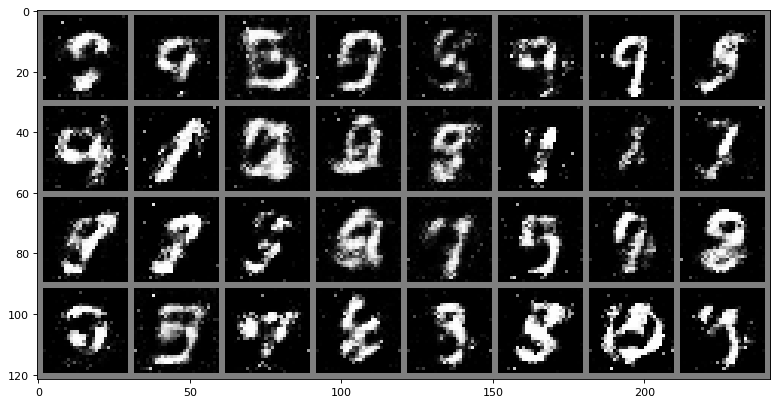

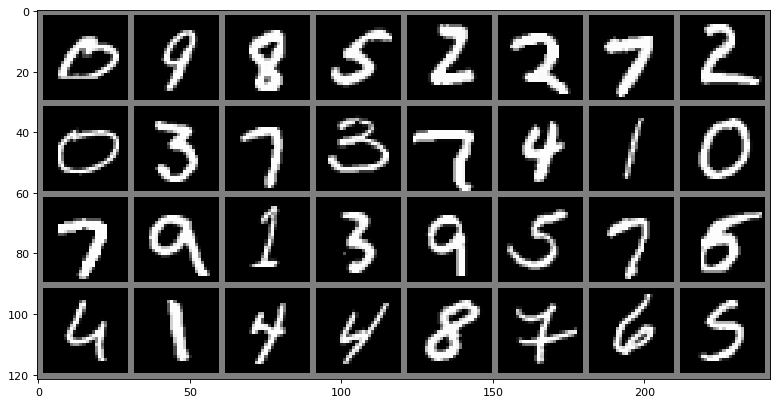

  1%|          | 15/1875 [00:00<00:25, 73.86it/s]

Epoch [1/50] Batch 0/1875                       Loss D: 0.6362, loss G: 1.1227


100%|██████████| 1875/1875 [00:22<00:00, 83.27it/s]


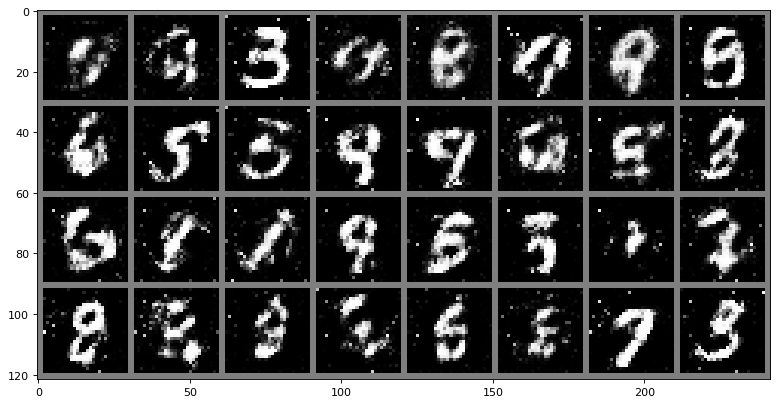

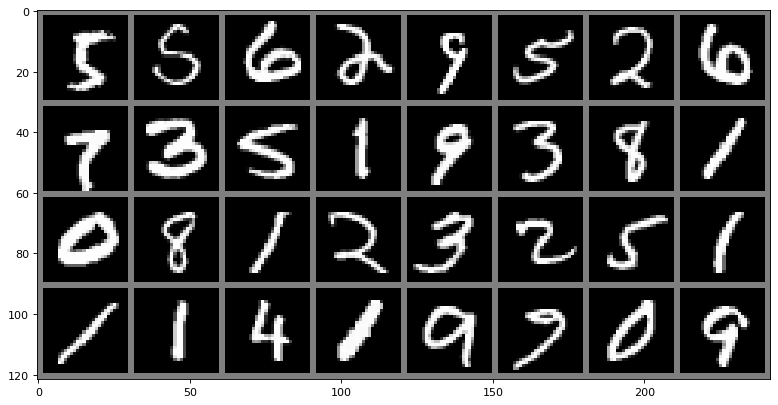

  1%|          | 16/1875 [00:00<00:24, 75.53it/s]

Epoch [2/50] Batch 0/1875                       Loss D: 0.7044, loss G: 0.9866


100%|██████████| 1875/1875 [00:22<00:00, 82.81it/s]


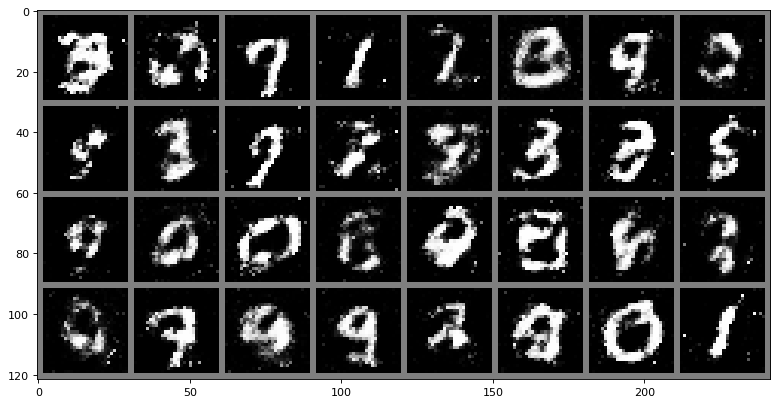

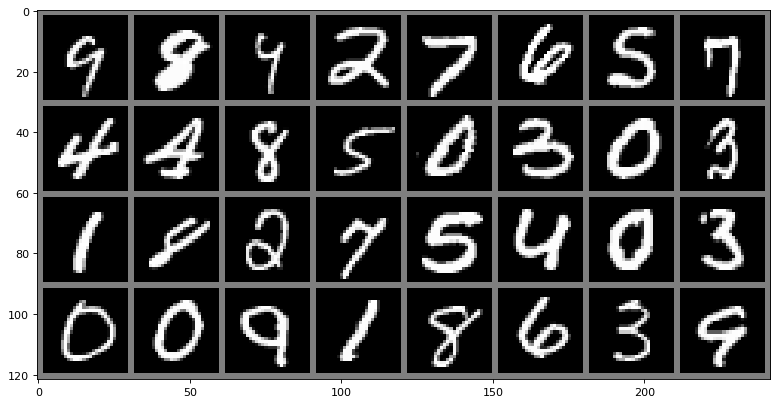

  0%|          | 7/1875 [00:00<00:26, 69.75it/s]

Epoch [3/50] Batch 0/1875                       Loss D: 0.5731, loss G: 0.9518


100%|██████████| 1875/1875 [00:22<00:00, 82.99it/s]


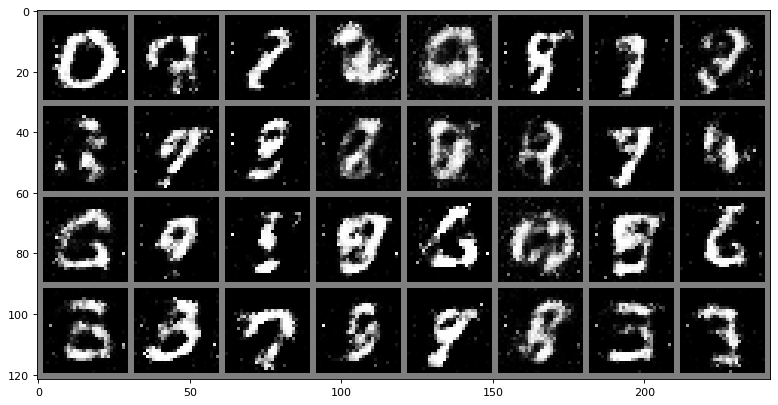

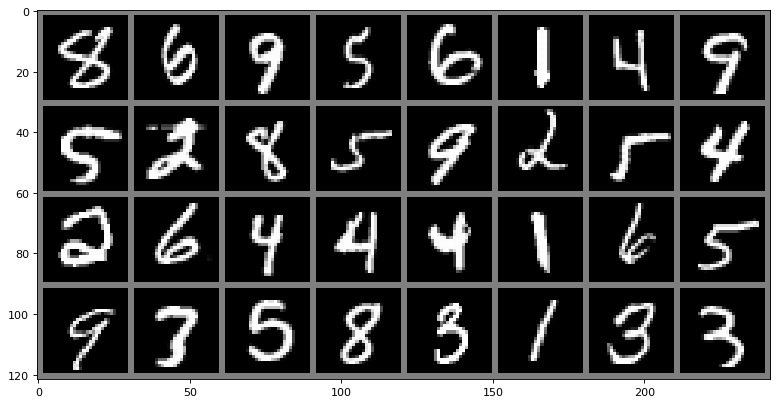

  1%|          | 16/1875 [00:00<00:24, 74.69it/s]

Epoch [4/50] Batch 0/1875                       Loss D: 0.6132, loss G: 1.1471


100%|██████████| 1875/1875 [00:22<00:00, 82.95it/s]


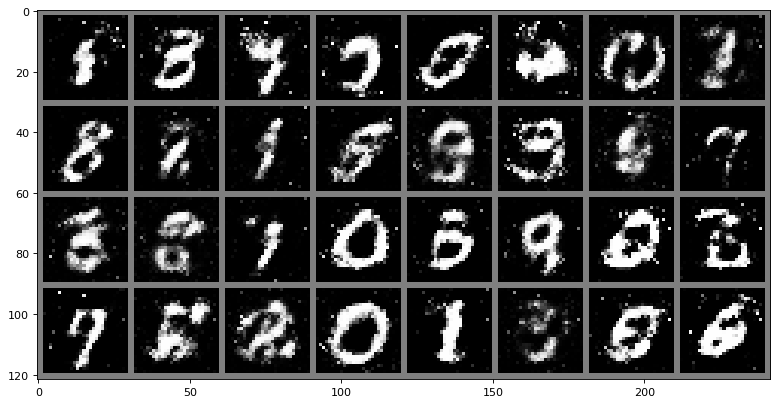

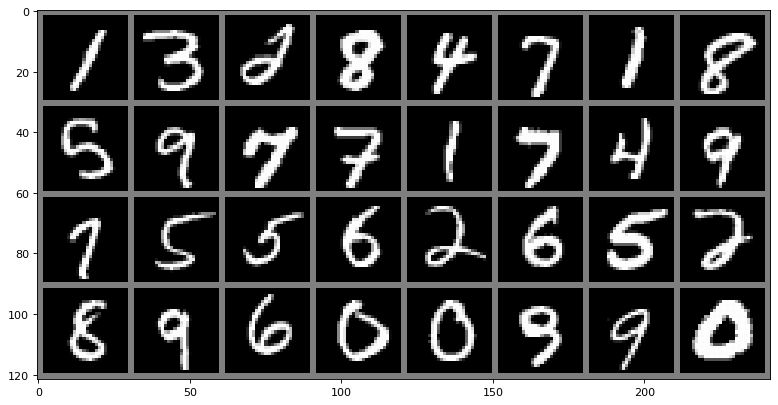

  0%|          | 7/1875 [00:00<00:26, 69.67it/s]

Epoch [5/50] Batch 0/1875                       Loss D: 0.7743, loss G: 0.8687


100%|██████████| 1875/1875 [00:22<00:00, 82.91it/s]


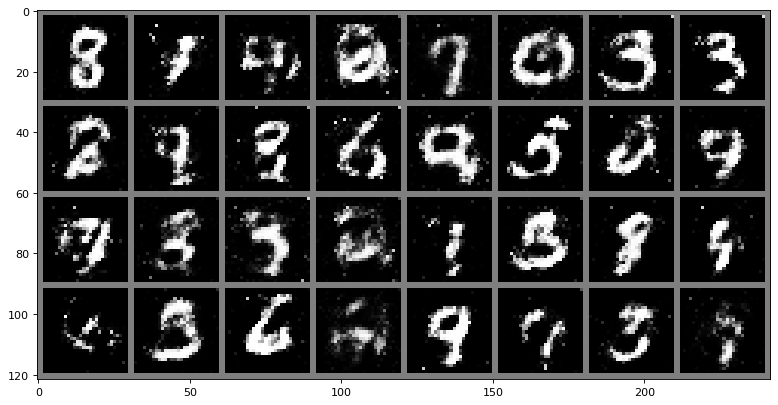

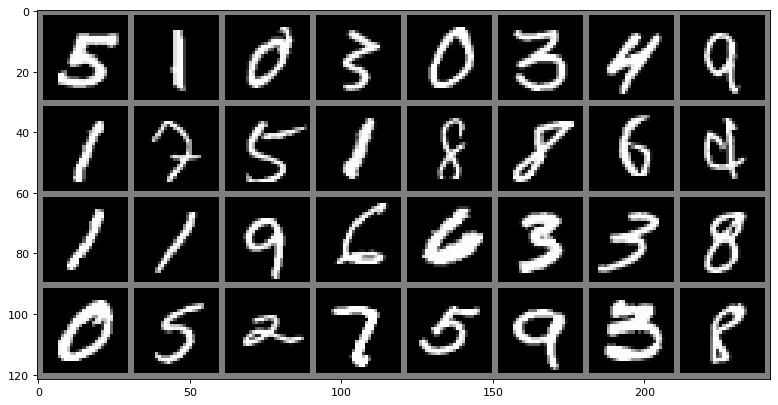

  1%|          | 16/1875 [00:00<00:24, 75.47it/s]

Epoch [6/50] Batch 0/1875                       Loss D: 0.5926, loss G: 1.0231


100%|██████████| 1875/1875 [00:22<00:00, 83.28it/s]


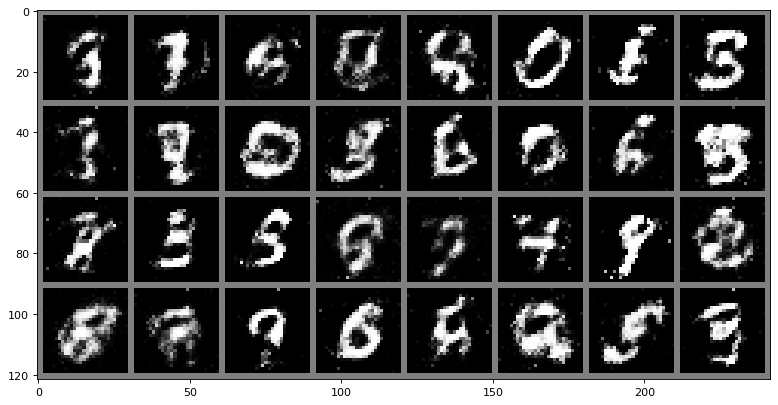

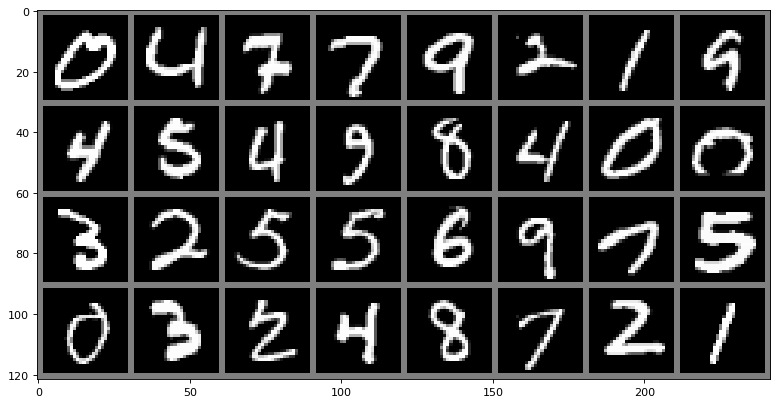

  0%|          | 7/1875 [00:00<00:29, 63.64it/s]

Epoch [7/50] Batch 0/1875                       Loss D: 0.6454, loss G: 0.9899


100%|██████████| 1875/1875 [00:22<00:00, 82.97it/s]


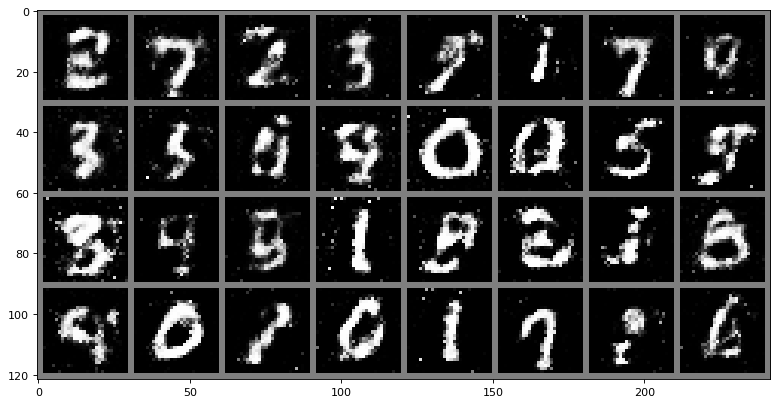

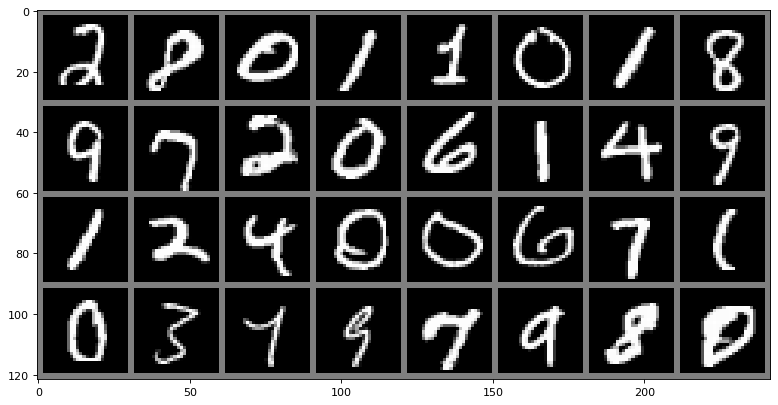

  0%|          | 7/1875 [00:00<00:29, 63.06it/s]

Epoch [8/50] Batch 0/1875                       Loss D: 0.5374, loss G: 1.0579


100%|██████████| 1875/1875 [00:22<00:00, 83.09it/s]


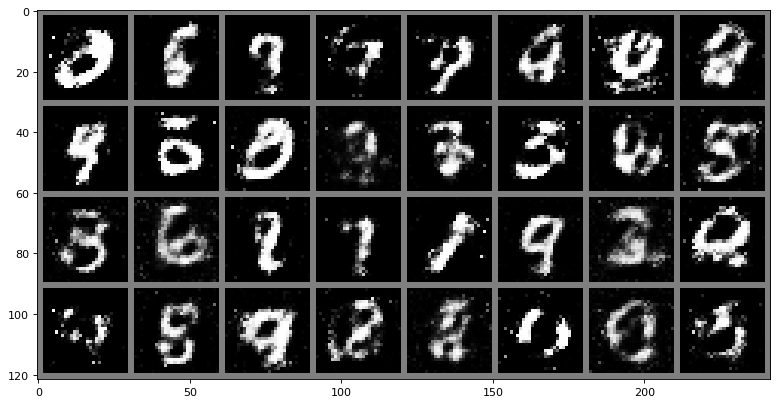

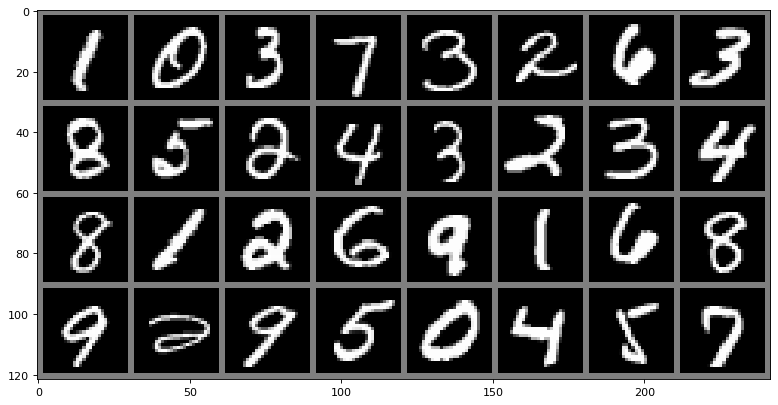

  0%|          | 7/1875 [00:00<00:27, 68.59it/s]

Epoch [9/50] Batch 0/1875                       Loss D: 0.7285, loss G: 0.8997


100%|██████████| 1875/1875 [00:22<00:00, 83.36it/s]


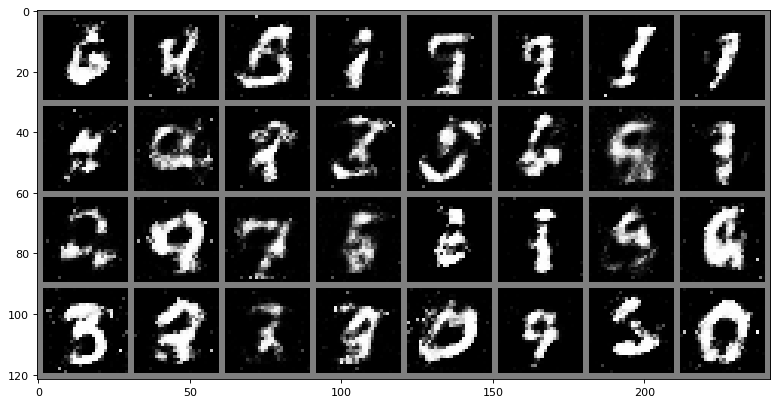

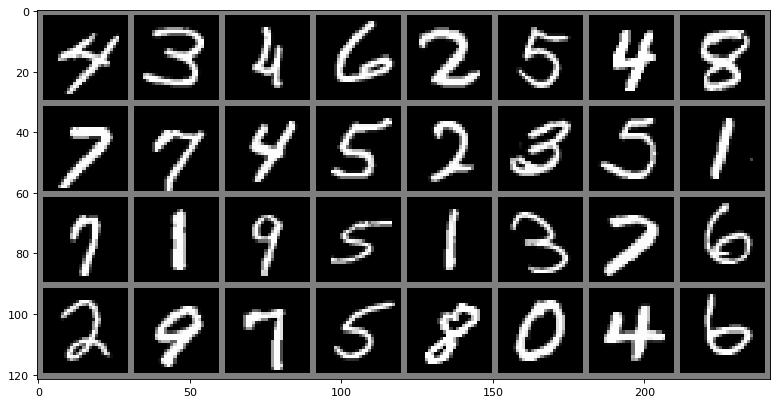

  1%|          | 16/1875 [00:00<00:24, 77.16it/s]

Epoch [10/50] Batch 0/1875                       Loss D: 0.6764, loss G: 0.8065


100%|██████████| 1875/1875 [00:22<00:00, 83.38it/s]


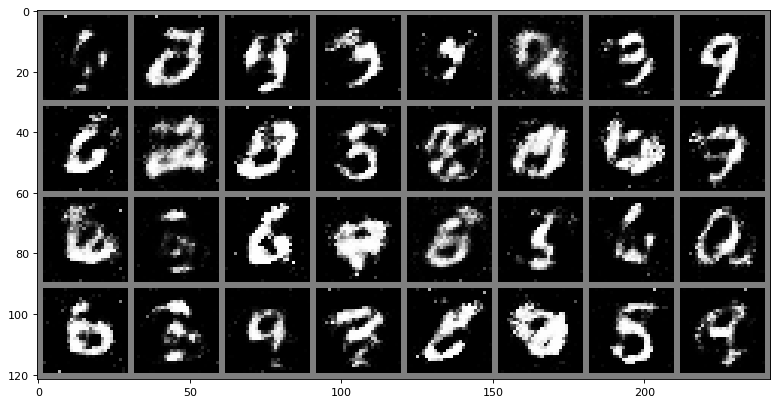

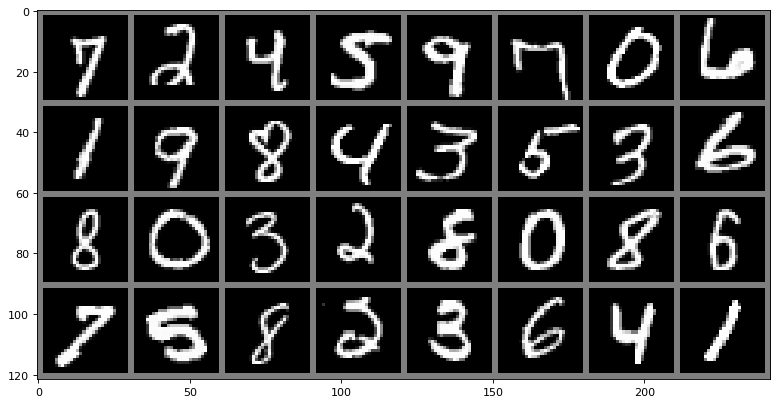

  1%|          | 16/1875 [00:00<00:24, 76.86it/s]

Epoch [11/50] Batch 0/1875                       Loss D: 0.7054, loss G: 0.8335


100%|██████████| 1875/1875 [00:23<00:00, 81.05it/s]


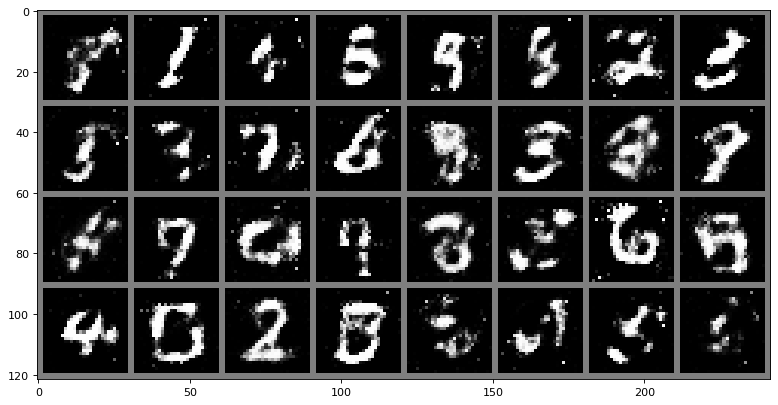

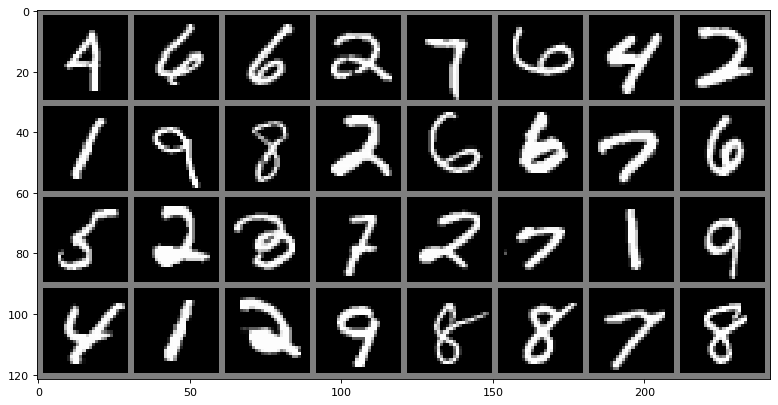

  0%|          | 7/1875 [00:00<00:30, 61.54it/s]

Epoch [12/50] Batch 0/1875                       Loss D: 0.6042, loss G: 0.9682


100%|██████████| 1875/1875 [00:22<00:00, 84.73it/s]


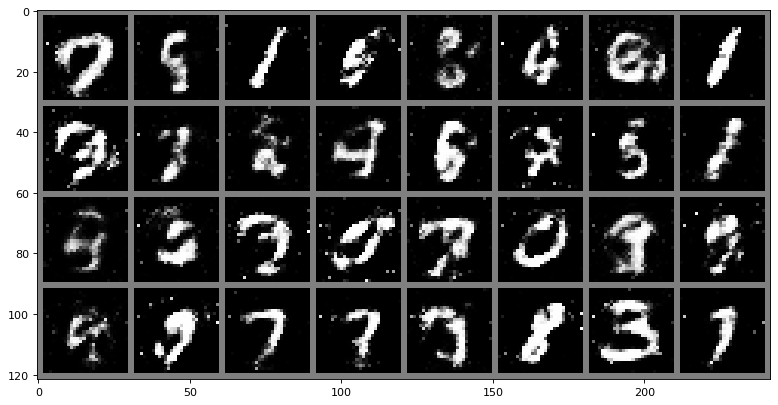

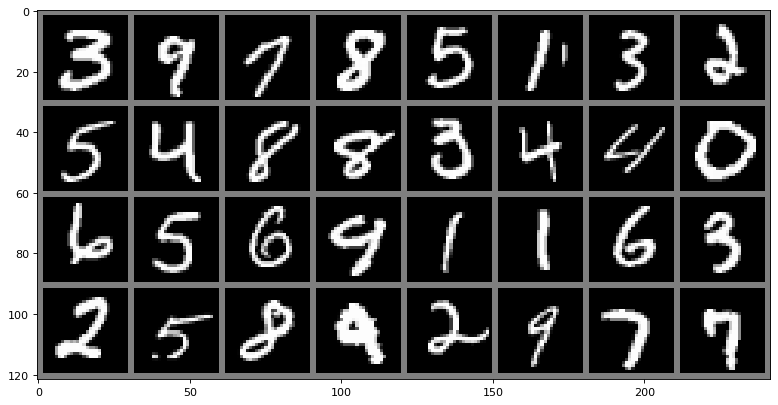

  0%|          | 8/1875 [00:00<00:25, 73.11it/s]

Epoch [13/50] Batch 0/1875                       Loss D: 0.6319, loss G: 0.9849


100%|██████████| 1875/1875 [00:22<00:00, 84.34it/s]


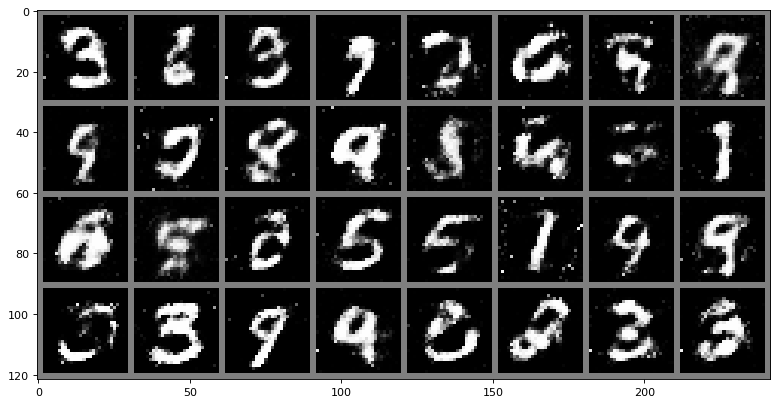

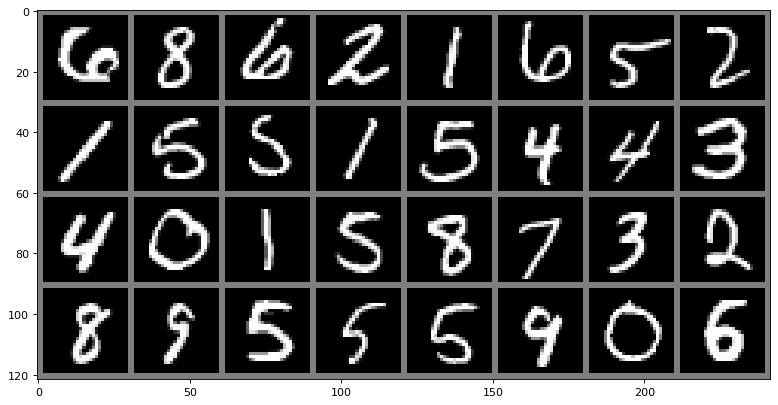

  1%|          | 14/1875 [00:00<00:27, 66.53it/s]

Epoch [14/50] Batch 0/1875                       Loss D: 0.6898, loss G: 0.9273


100%|██████████| 1875/1875 [00:22<00:00, 84.16it/s]


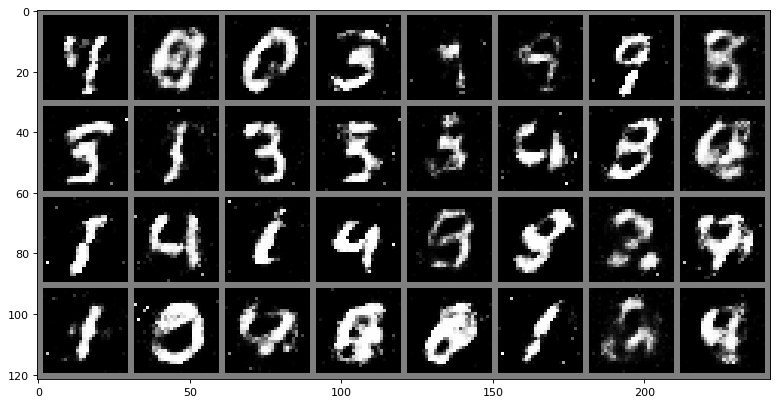

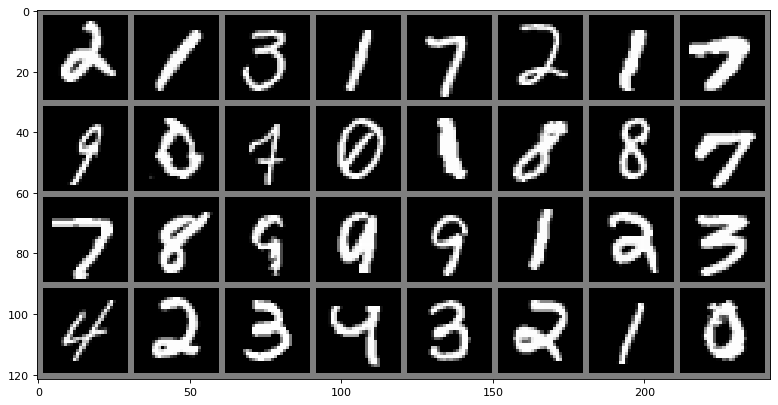

  0%|          | 8/1875 [00:00<00:25, 72.73it/s]

Epoch [15/50] Batch 0/1875                       Loss D: 0.6619, loss G: 0.7442


100%|██████████| 1875/1875 [00:22<00:00, 82.44it/s]


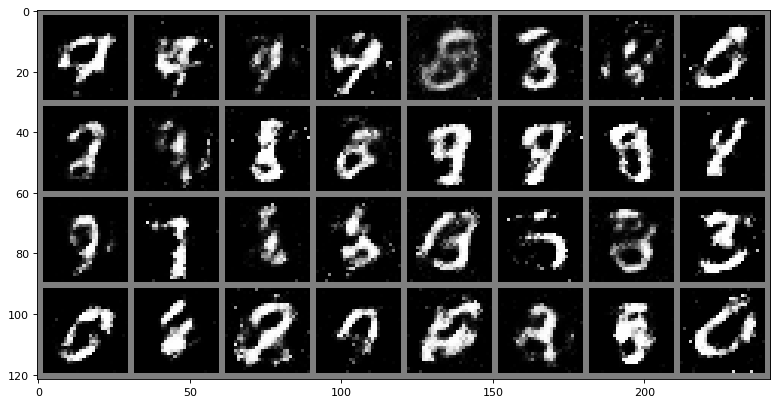

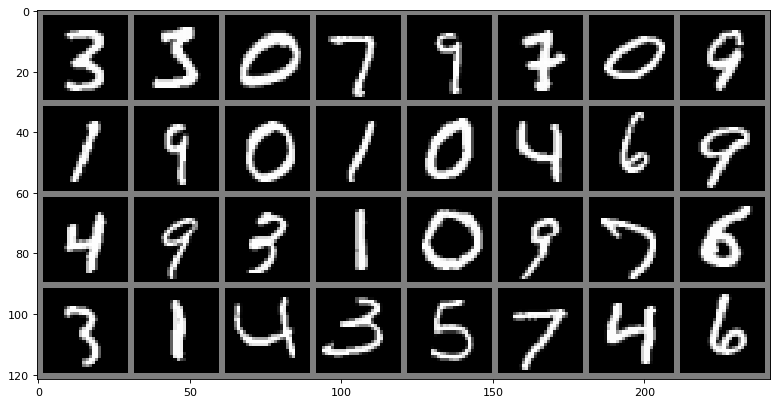

  0%|          | 7/1875 [00:00<00:29, 63.26it/s]

Epoch [16/50] Batch 0/1875                       Loss D: 0.6187, loss G: 0.8659


100%|██████████| 1875/1875 [00:23<00:00, 81.45it/s]


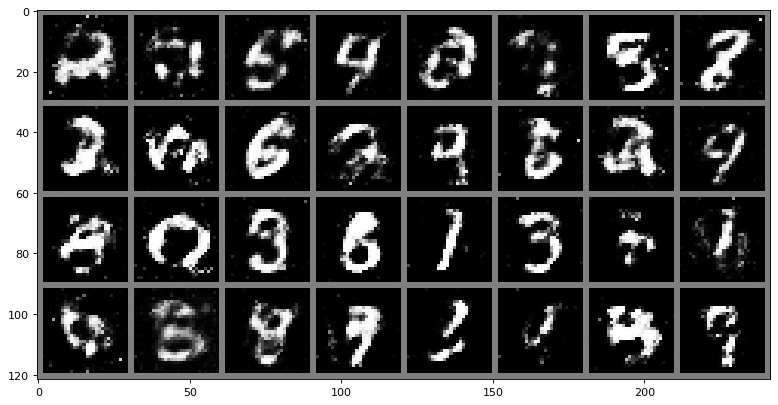

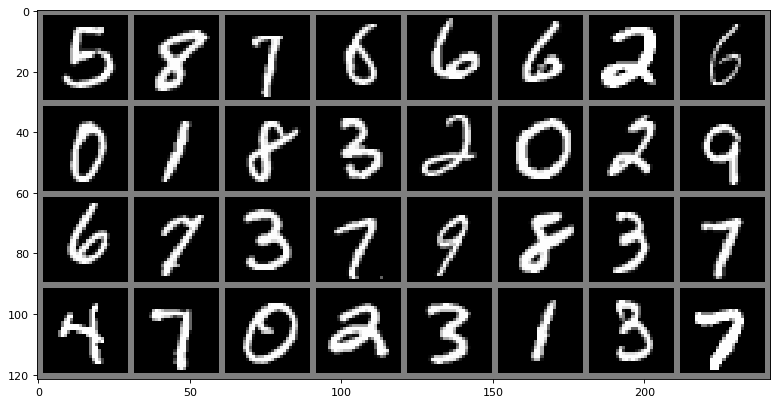

  0%|          | 7/1875 [00:00<00:28, 66.09it/s]

Epoch [17/50] Batch 0/1875                       Loss D: 0.6654, loss G: 0.8308


100%|██████████| 1875/1875 [00:22<00:00, 82.50it/s]


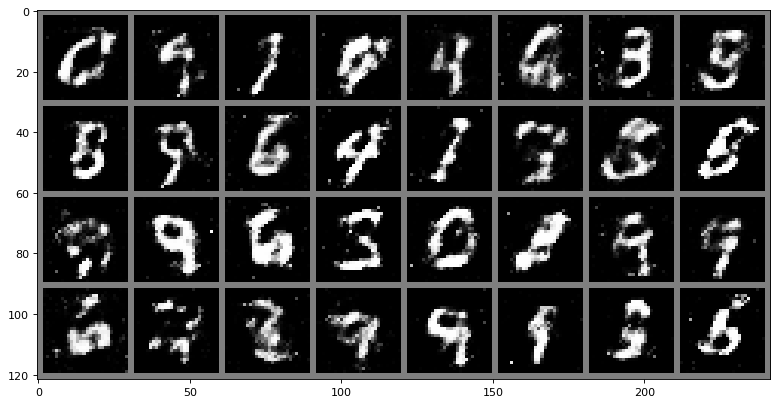

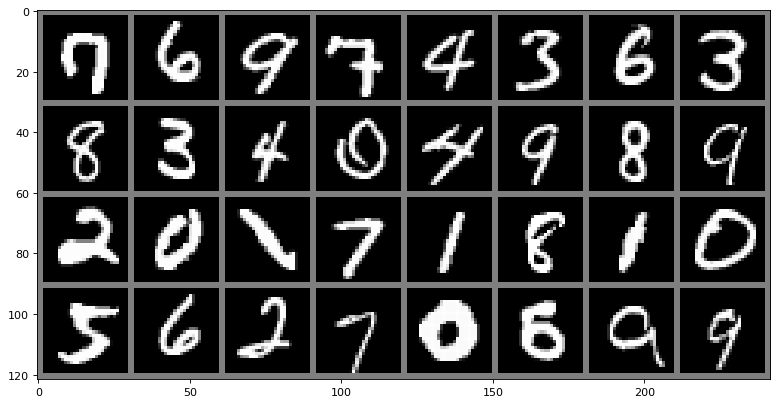

  1%|          | 12/1875 [00:00<00:31, 59.70it/s]

Epoch [18/50] Batch 0/1875                       Loss D: 0.5905, loss G: 0.9117


100%|██████████| 1875/1875 [00:22<00:00, 82.18it/s]


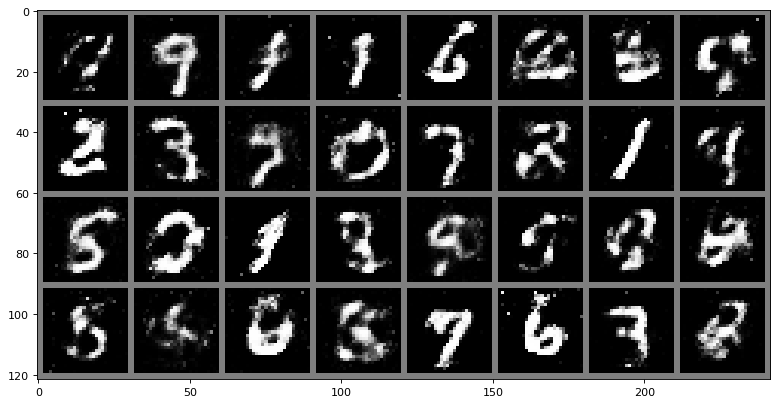

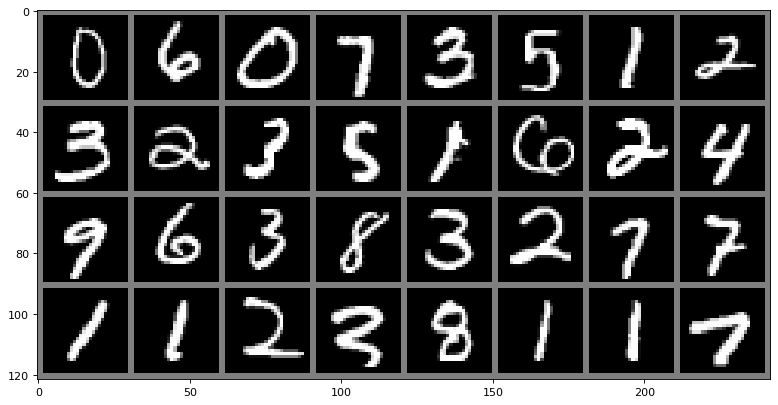

  1%|          | 15/1875 [00:00<00:25, 74.33it/s]

Epoch [19/50] Batch 0/1875                       Loss D: 0.6558, loss G: 0.8529


100%|██████████| 1875/1875 [00:22<00:00, 84.28it/s]


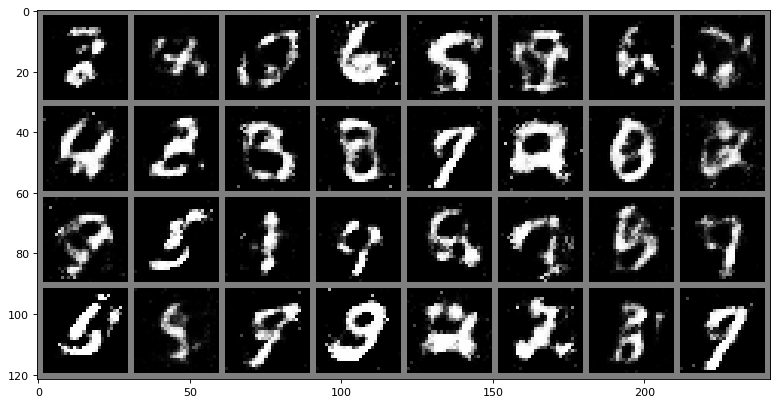

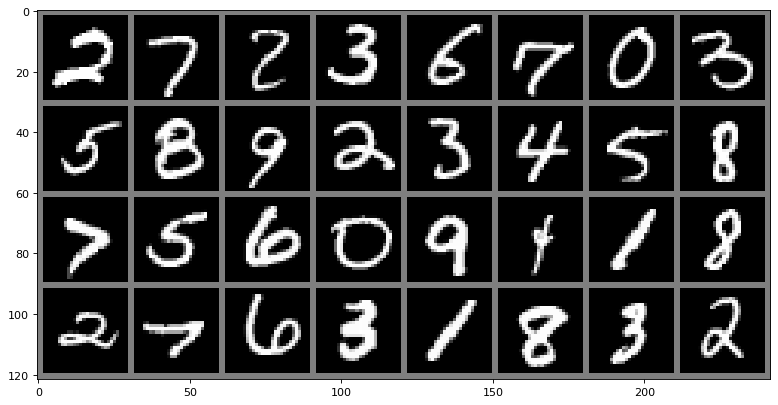

  0%|          | 7/1875 [00:00<00:27, 66.99it/s]

Epoch [20/50] Batch 0/1875                       Loss D: 0.6924, loss G: 0.7229


100%|██████████| 1875/1875 [00:22<00:00, 84.36it/s]


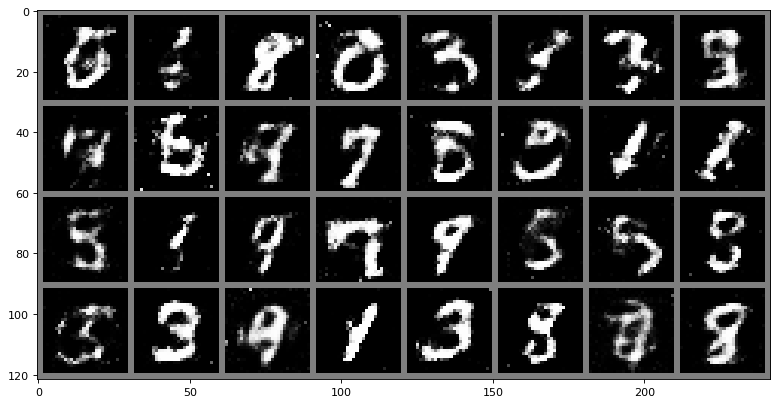

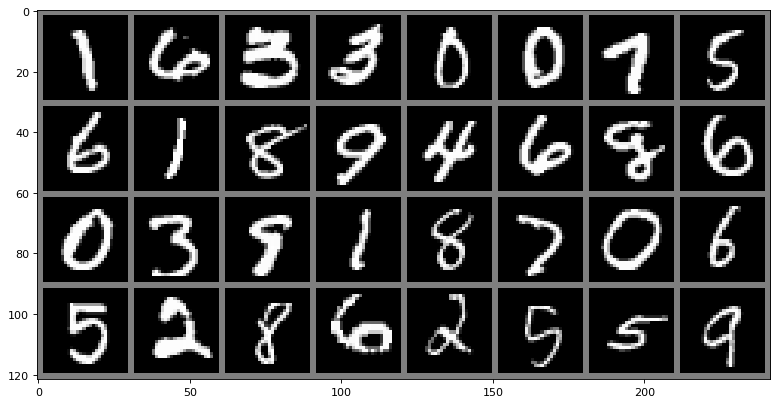

  0%|          | 7/1875 [00:00<00:27, 68.24it/s]

Epoch [21/50] Batch 0/1875                       Loss D: 0.6595, loss G: 0.9208


100%|██████████| 1875/1875 [00:22<00:00, 82.44it/s]


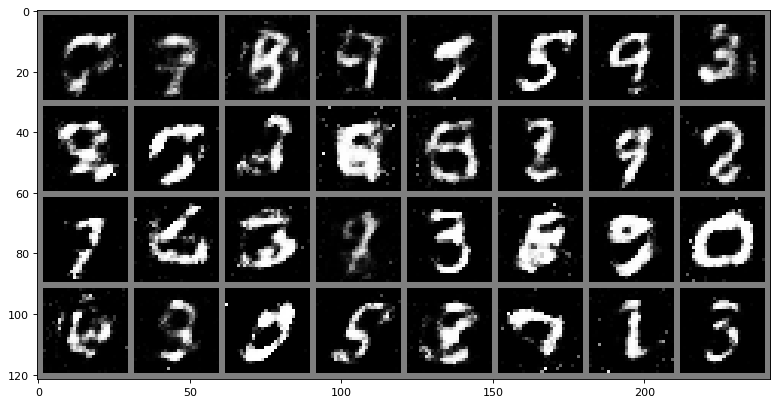

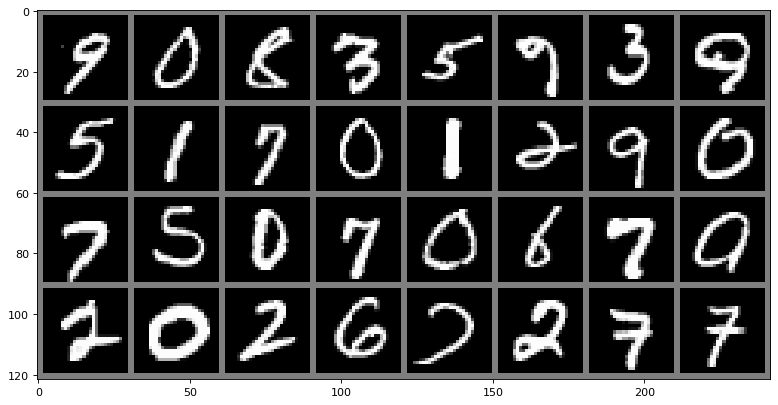

  0%|          | 7/1875 [00:00<00:27, 68.72it/s]

Epoch [22/50] Batch 0/1875                       Loss D: 0.5897, loss G: 0.9197


100%|██████████| 1875/1875 [00:22<00:00, 82.89it/s]


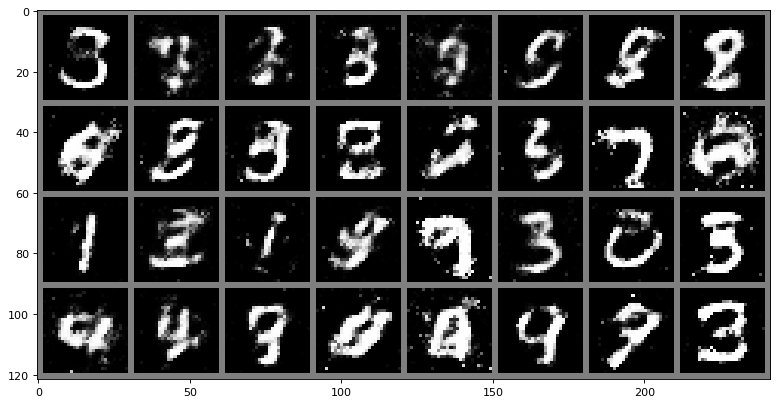

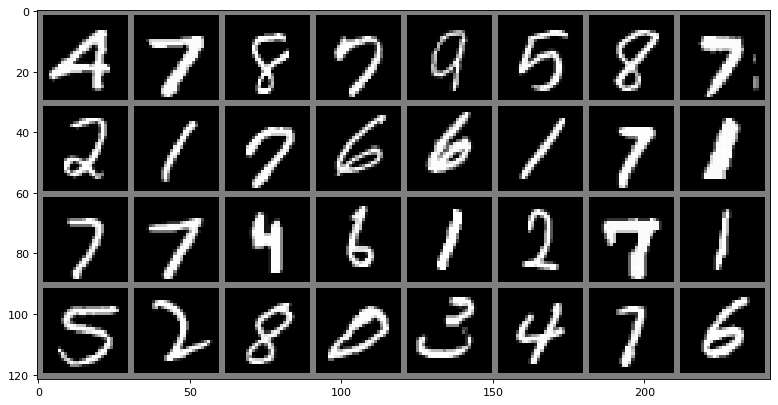

  1%|          | 14/1875 [00:00<00:27, 67.31it/s]

Epoch [23/50] Batch 0/1875                       Loss D: 0.4823, loss G: 1.1433


100%|██████████| 1875/1875 [00:22<00:00, 82.55it/s]


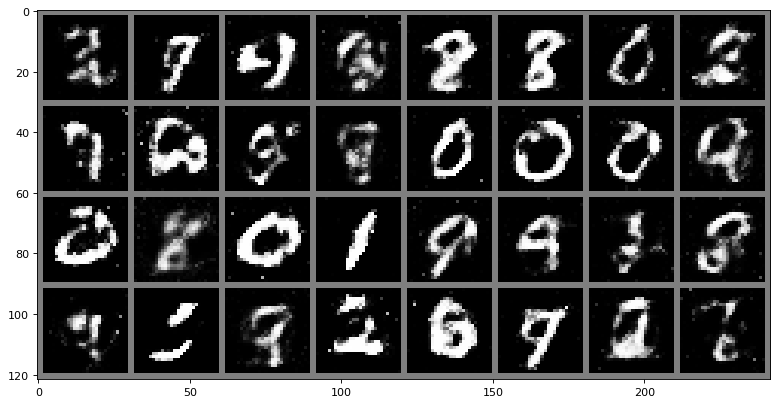

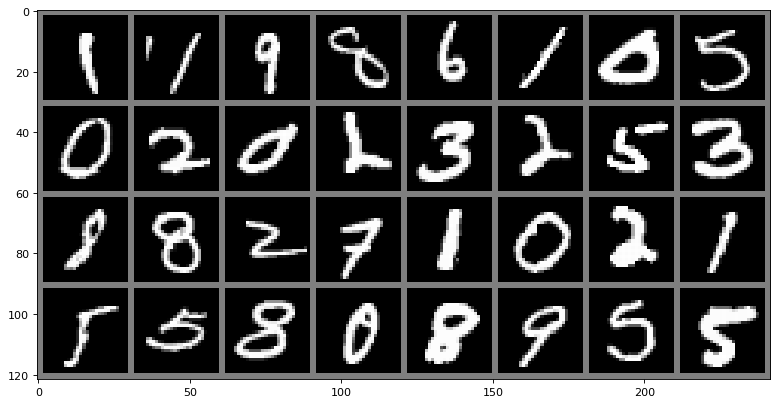

  1%|          | 16/1875 [00:00<00:24, 75.70it/s]

Epoch [24/50] Batch 0/1875                       Loss D: 0.5777, loss G: 1.0372


100%|██████████| 1875/1875 [00:22<00:00, 84.24it/s]


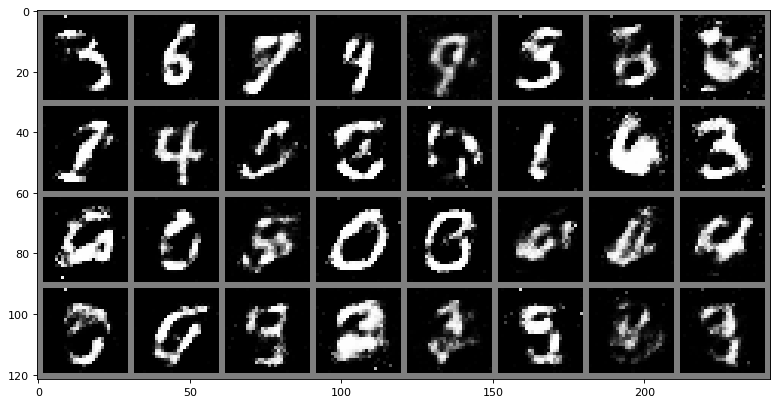

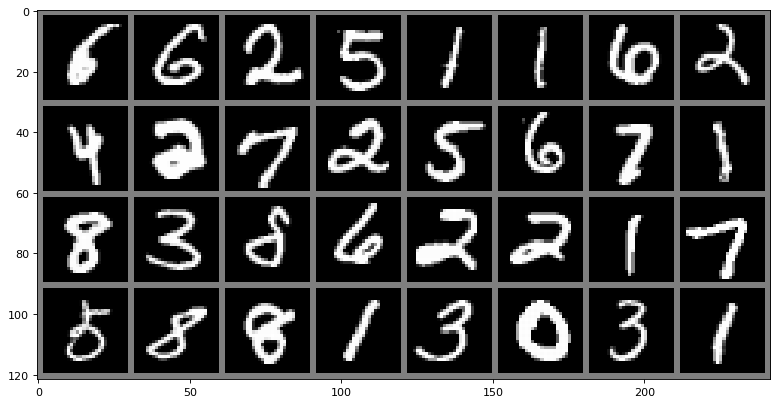

  1%|          | 16/1875 [00:00<00:24, 74.43it/s]

Epoch [25/50] Batch 0/1875                       Loss D: 0.6120, loss G: 1.0625


100%|██████████| 1875/1875 [00:22<00:00, 84.44it/s]


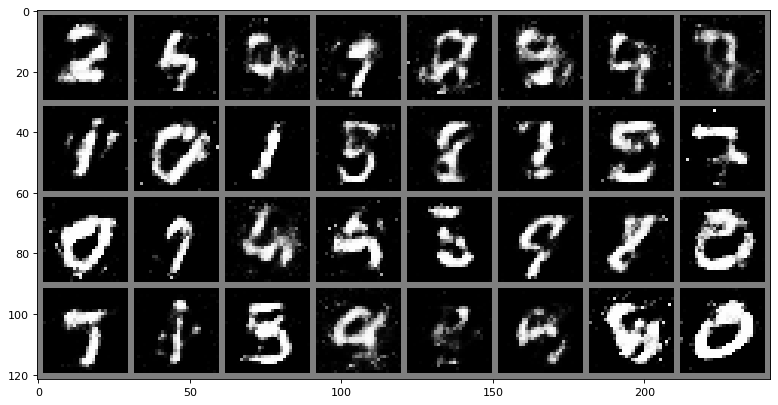

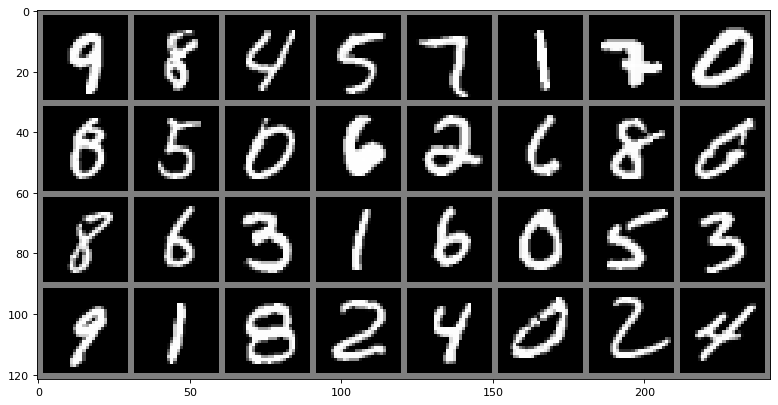

  0%|          | 8/1875 [00:00<00:25, 72.34it/s]

Epoch [26/50] Batch 0/1875                       Loss D: 0.6809, loss G: 0.9043


100%|██████████| 1875/1875 [00:22<00:00, 81.75it/s]


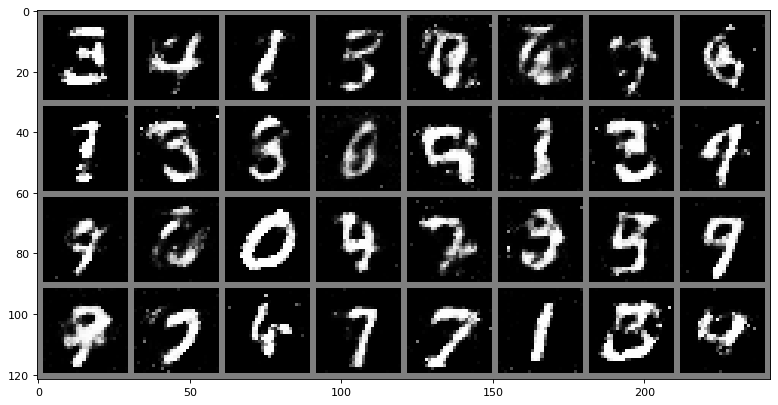

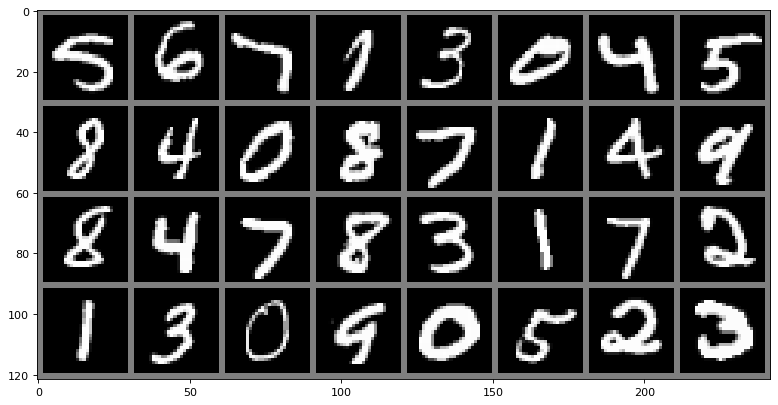

  0%|          | 6/1875 [00:00<00:31, 59.47it/s]

Epoch [27/50] Batch 0/1875                       Loss D: 0.5826, loss G: 0.9402


100%|██████████| 1875/1875 [00:22<00:00, 83.71it/s]


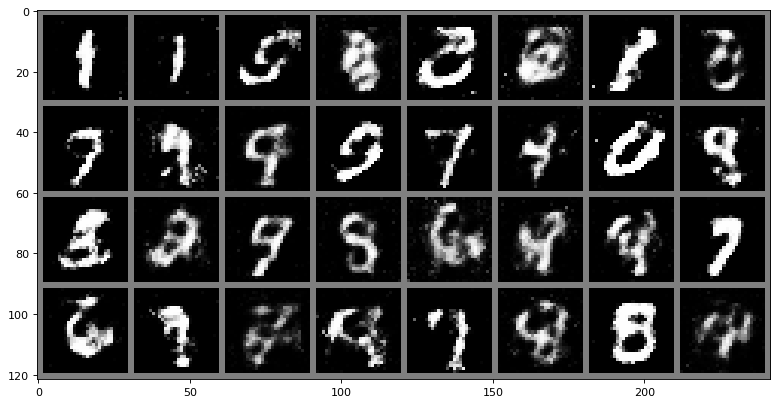

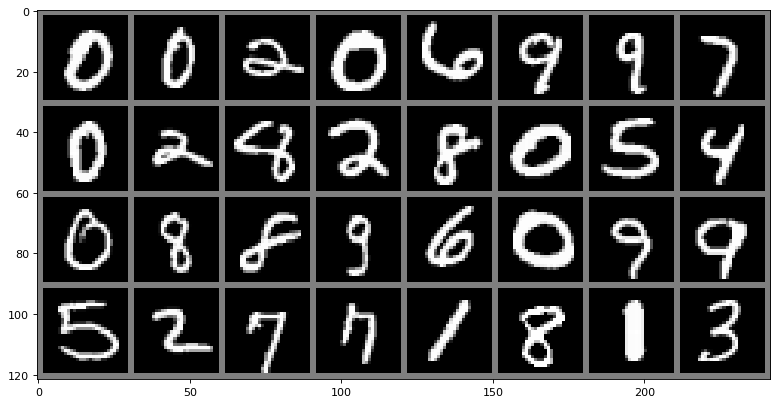

  0%|          | 7/1875 [00:00<00:30, 62.05it/s]

Epoch [28/50] Batch 0/1875                       Loss D: 0.6759, loss G: 0.8081


100%|██████████| 1875/1875 [00:22<00:00, 82.31it/s]


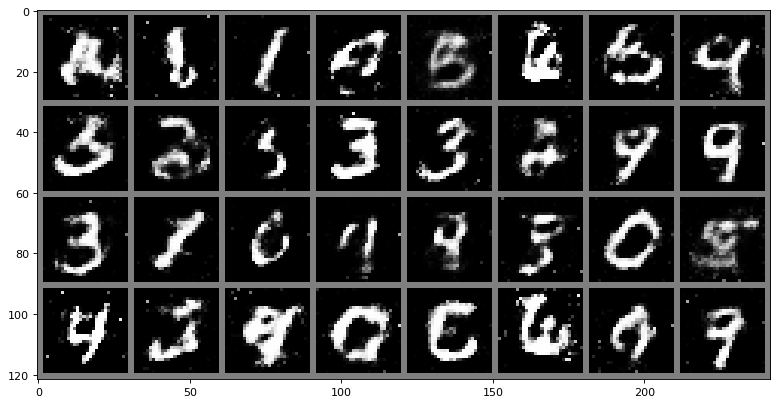

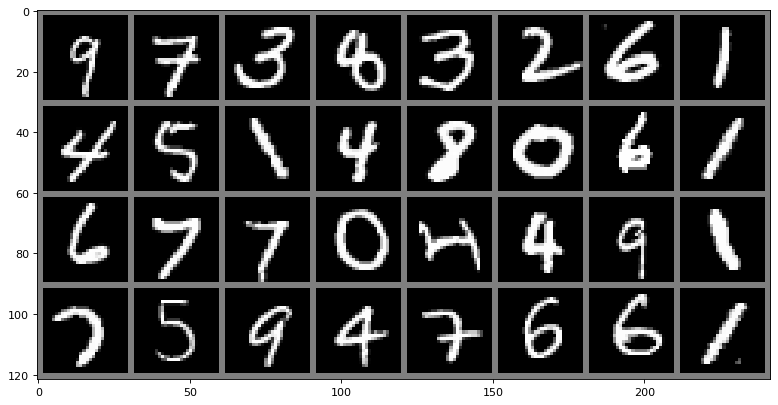

  0%|          | 7/1875 [00:00<00:27, 67.10it/s]

Epoch [29/50] Batch 0/1875                       Loss D: 0.5543, loss G: 1.2448


100%|██████████| 1875/1875 [00:22<00:00, 83.75it/s]


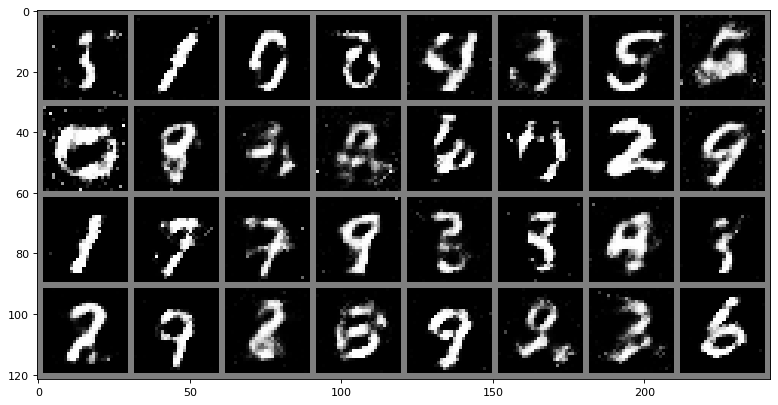

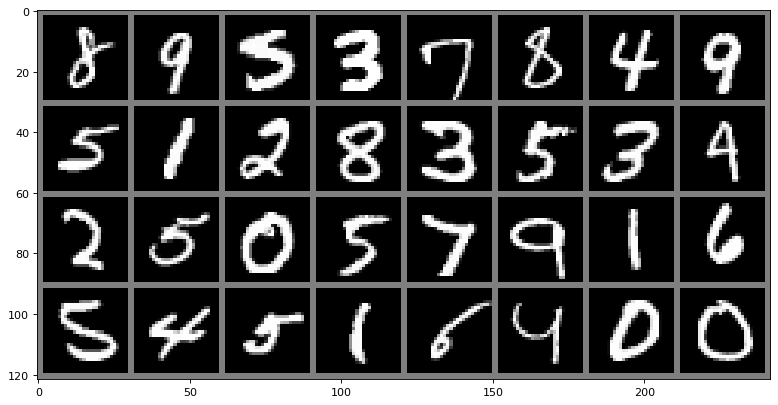

  0%|          | 7/1875 [00:00<00:29, 63.29it/s]

Epoch [30/50] Batch 0/1875                       Loss D: 0.5930, loss G: 1.0307


100%|██████████| 1875/1875 [00:22<00:00, 84.52it/s]


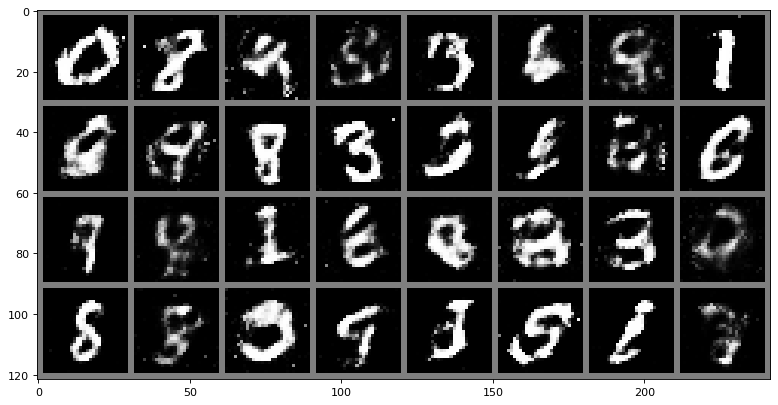

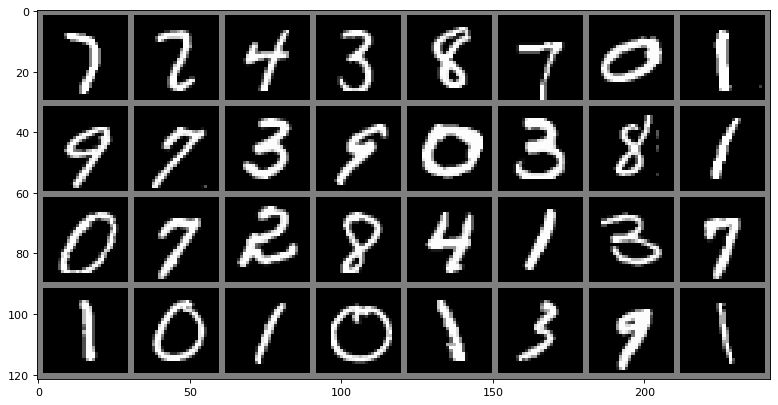

  0%|          | 7/1875 [00:00<00:27, 67.31it/s]

Epoch [31/50] Batch 0/1875                       Loss D: 0.6354, loss G: 0.9368


100%|██████████| 1875/1875 [00:22<00:00, 84.20it/s]


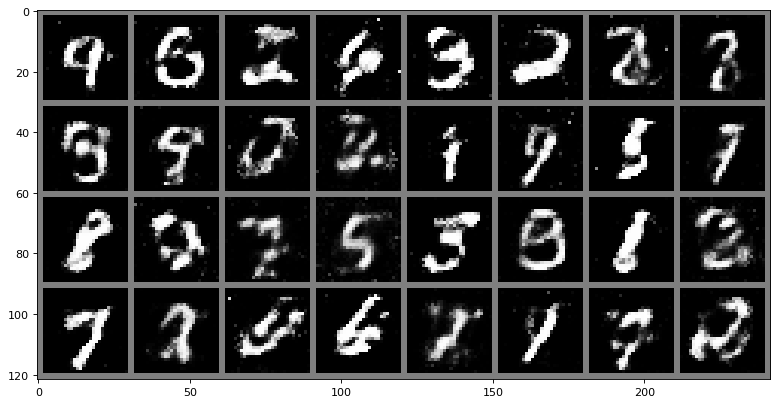

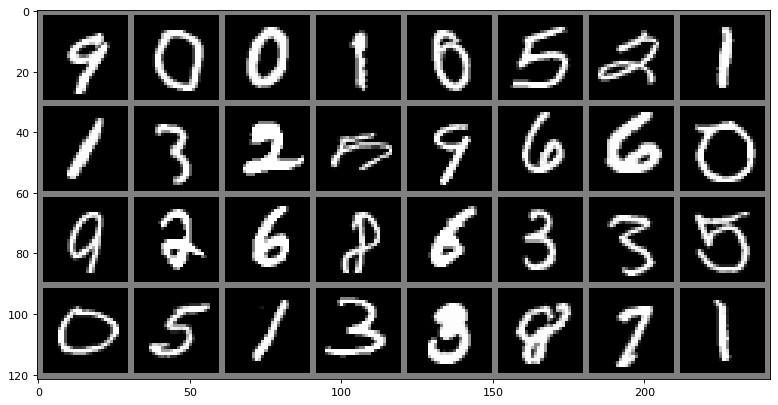

  1%|          | 16/1875 [00:00<00:24, 76.69it/s]

Epoch [32/50] Batch 0/1875                       Loss D: 0.6052, loss G: 0.8565


100%|██████████| 1875/1875 [00:22<00:00, 84.44it/s]


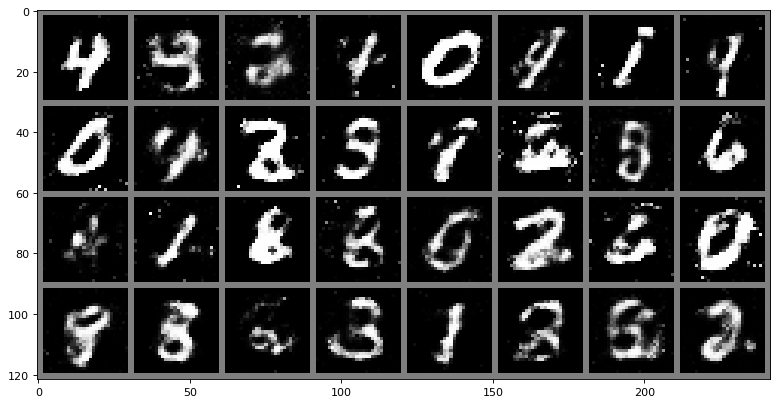

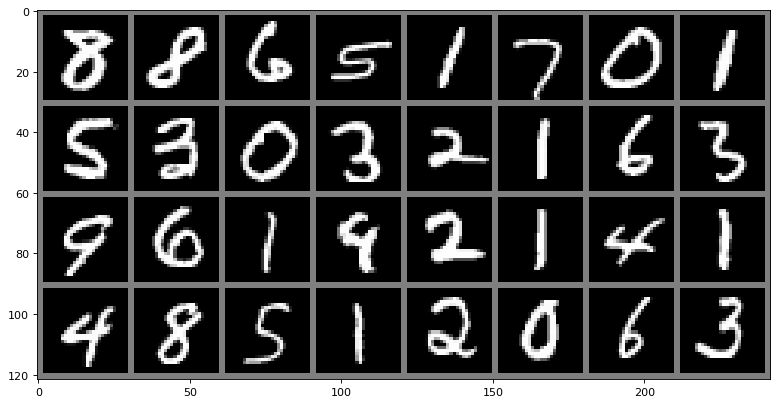

  1%|          | 16/1875 [00:00<00:25, 73.71it/s]

Epoch [33/50] Batch 0/1875                       Loss D: 0.6804, loss G: 0.8884


100%|██████████| 1875/1875 [00:22<00:00, 84.05it/s]


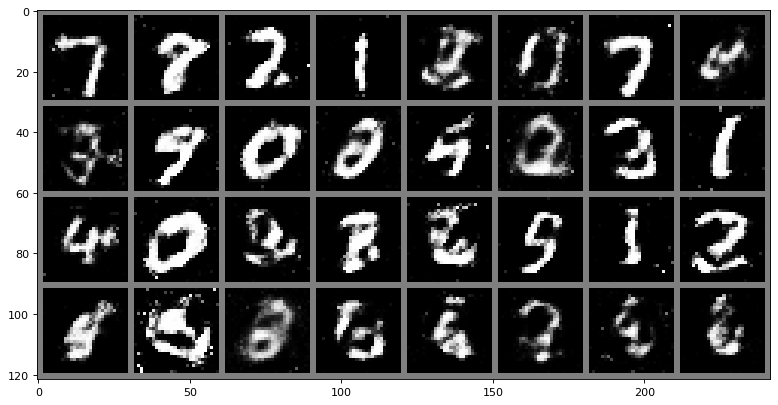

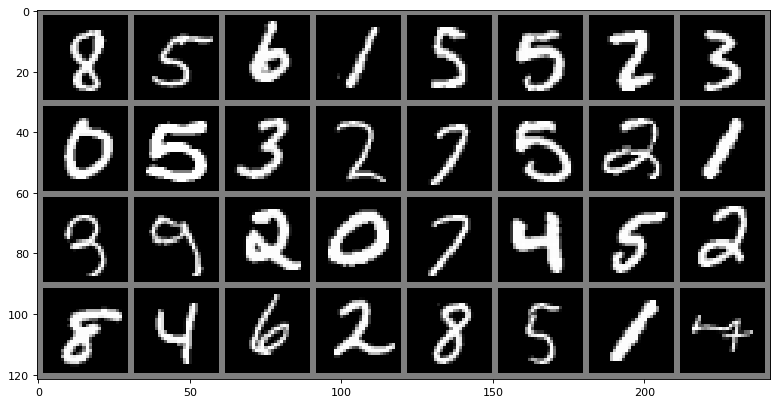

  0%|          | 7/1875 [00:00<00:28, 65.67it/s]

Epoch [34/50] Batch 0/1875                       Loss D: 0.6395, loss G: 1.0520


100%|██████████| 1875/1875 [00:22<00:00, 83.91it/s]


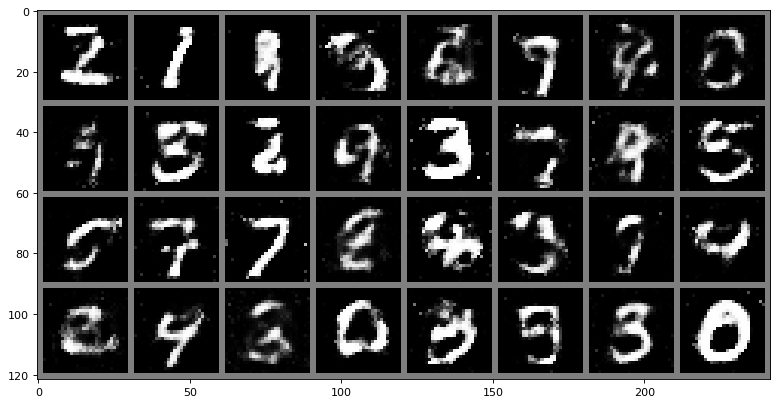

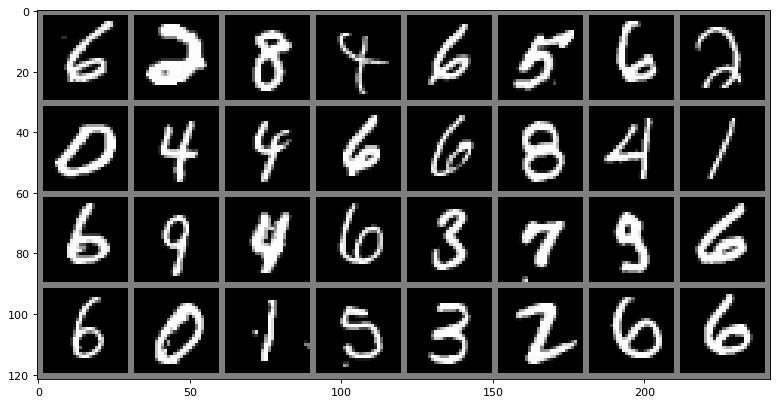

  0%|          | 8/1875 [00:00<00:24, 74.70it/s]

Epoch [35/50] Batch 0/1875                       Loss D: 0.5919, loss G: 0.8629


100%|██████████| 1875/1875 [00:22<00:00, 84.39it/s]


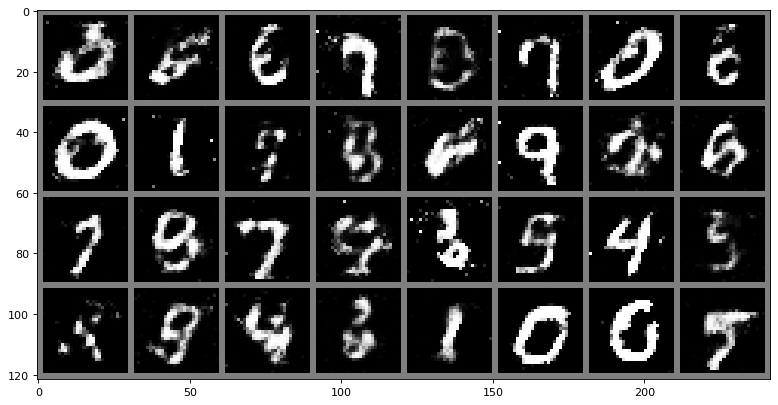

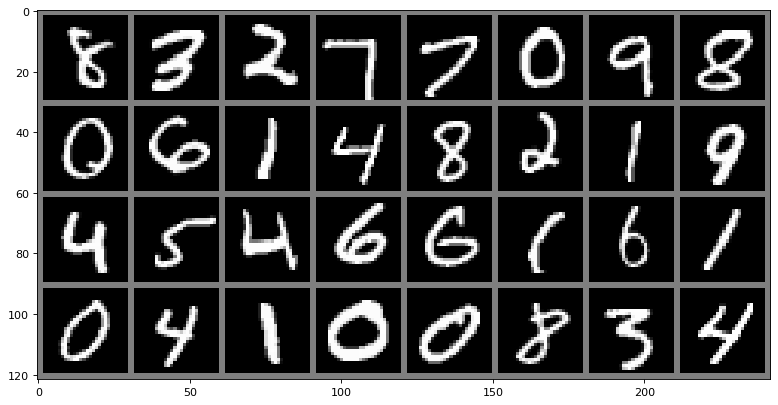

  1%|          | 15/1875 [00:00<00:25, 71.94it/s]

Epoch [36/50] Batch 0/1875                       Loss D: 0.6058, loss G: 0.9596


100%|██████████| 1875/1875 [00:22<00:00, 83.92it/s]


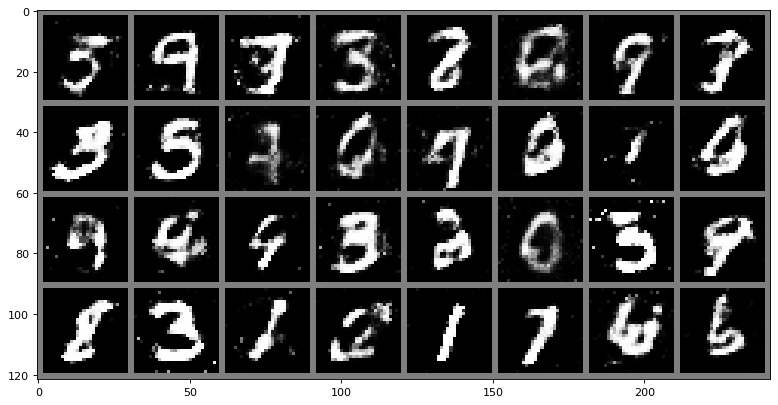

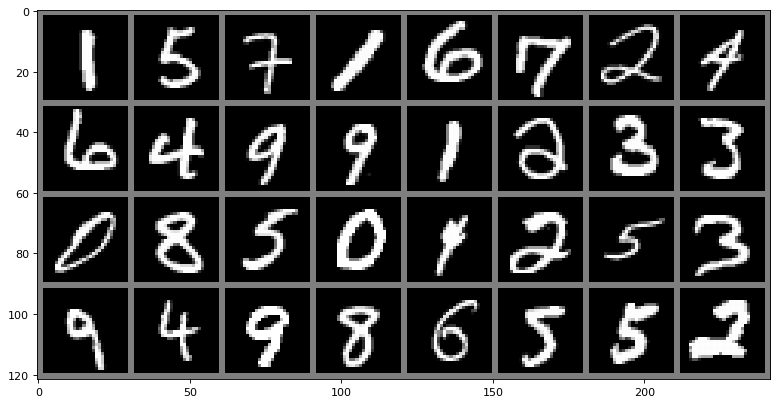

  0%|          | 7/1875 [00:00<00:28, 64.81it/s]

Epoch [37/50] Batch 0/1875                       Loss D: 0.5834, loss G: 1.0564


100%|██████████| 1875/1875 [00:22<00:00, 84.09it/s]


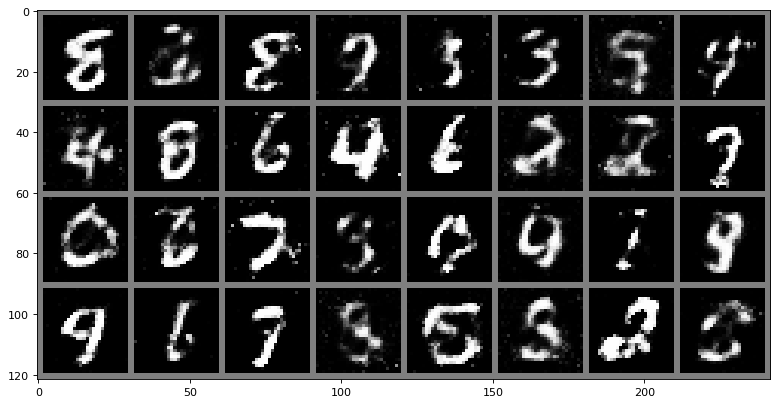

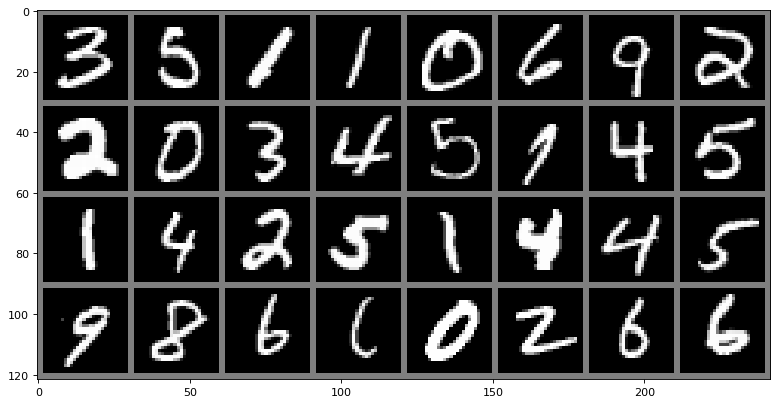

  0%|          | 8/1875 [00:00<00:24, 75.65it/s]

Epoch [38/50] Batch 0/1875                       Loss D: 0.6128, loss G: 0.9407


100%|██████████| 1875/1875 [00:22<00:00, 82.15it/s]


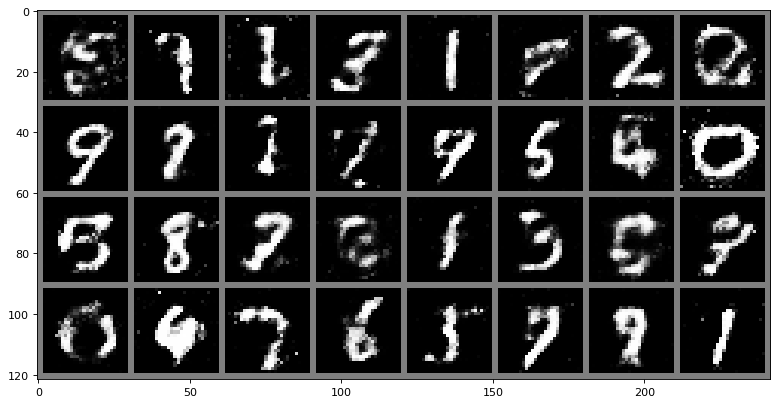

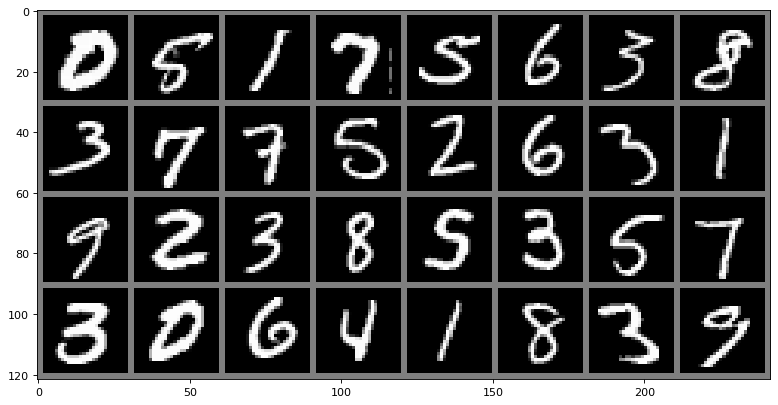

  0%|          | 8/1875 [00:00<00:26, 70.18it/s]

Epoch [39/50] Batch 0/1875                       Loss D: 0.5407, loss G: 1.0271


100%|██████████| 1875/1875 [00:22<00:00, 84.12it/s]


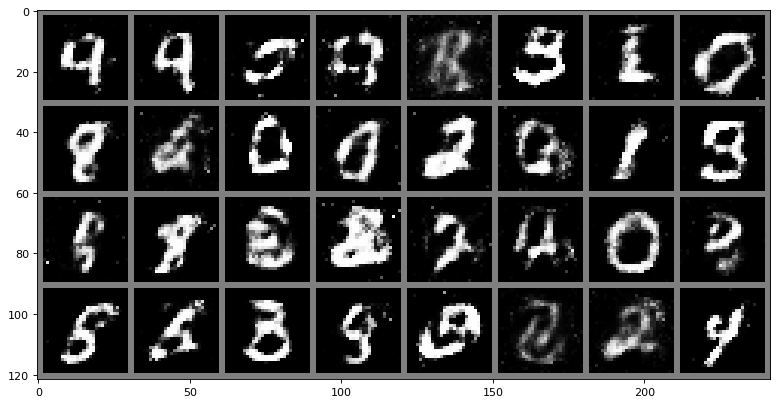

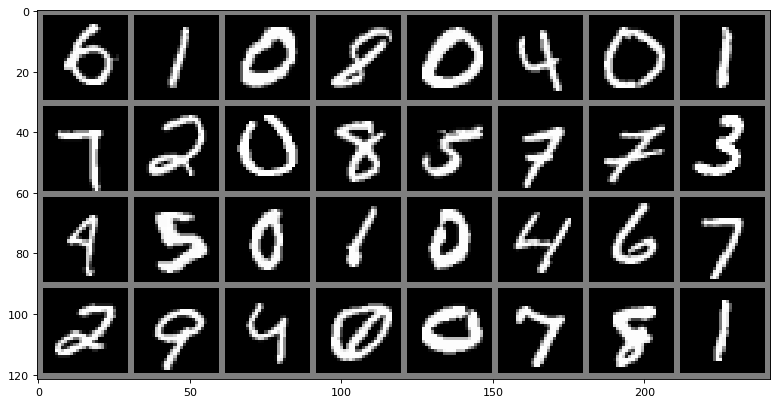

  1%|          | 14/1875 [00:00<00:29, 63.06it/s]

Epoch [40/50] Batch 0/1875                       Loss D: 0.5254, loss G: 1.1451


100%|██████████| 1875/1875 [00:22<00:00, 84.27it/s]


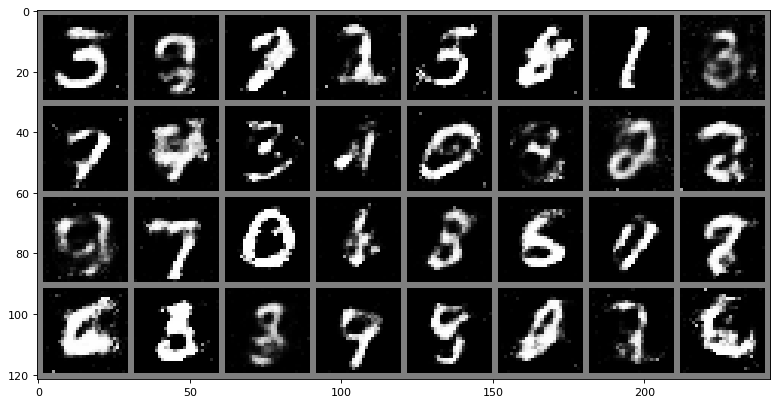

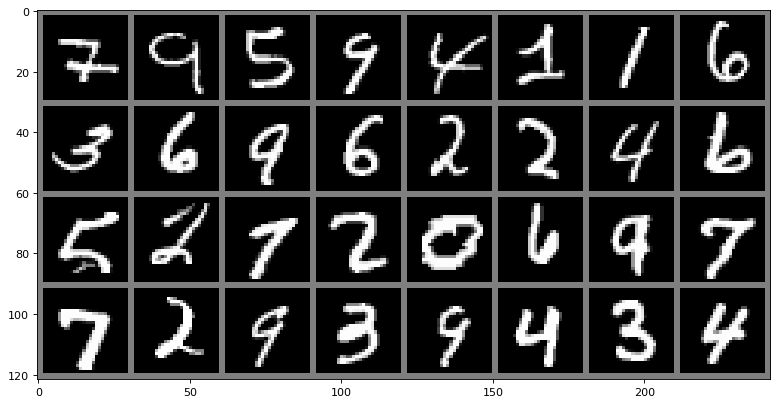

  0%|          | 7/1875 [00:00<00:28, 65.18it/s]

Epoch [41/50] Batch 0/1875                       Loss D: 0.6397, loss G: 0.9524


100%|██████████| 1875/1875 [00:22<00:00, 83.90it/s]


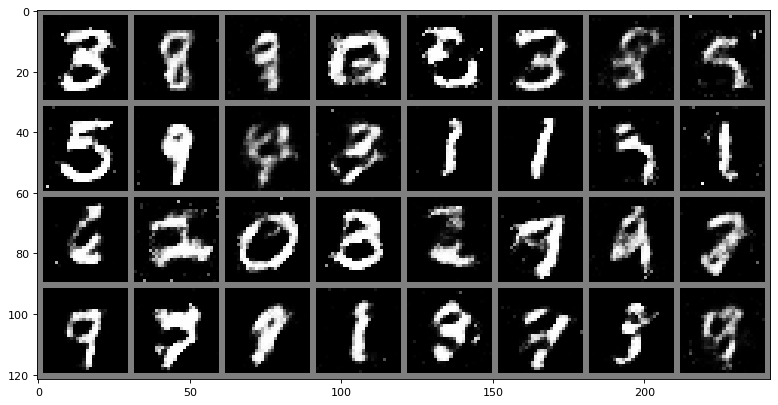

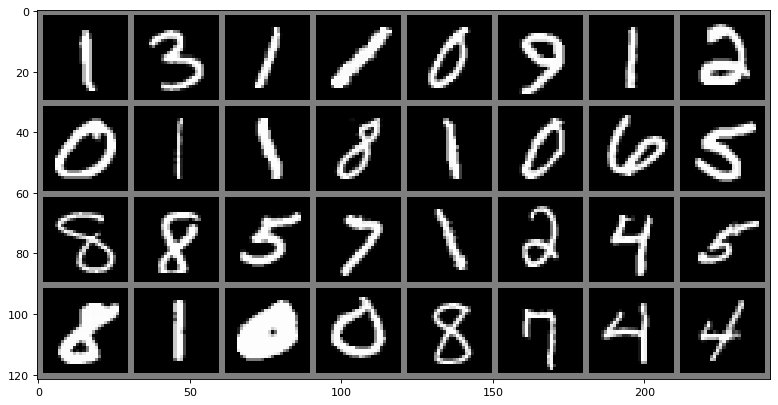

  0%|          | 7/1875 [00:00<00:29, 62.93it/s]

Epoch [42/50] Batch 0/1875                       Loss D: 0.5583, loss G: 1.0637


100%|██████████| 1875/1875 [00:22<00:00, 84.52it/s]


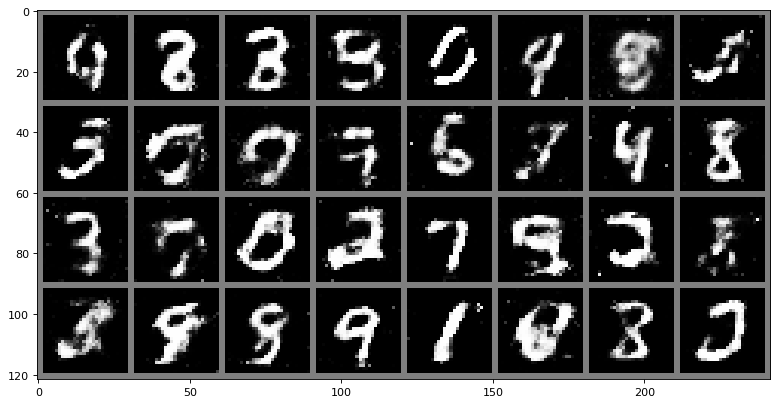

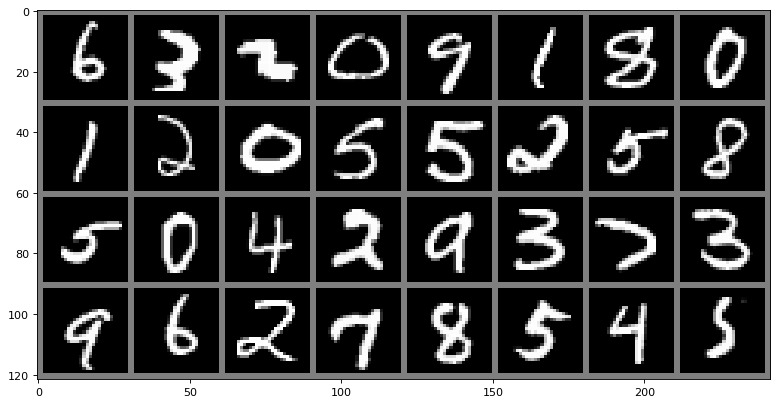

  0%|          | 7/1875 [00:00<00:30, 61.48it/s]

Epoch [43/50] Batch 0/1875                       Loss D: 0.4759, loss G: 1.2051


100%|██████████| 1875/1875 [00:23<00:00, 80.59it/s]


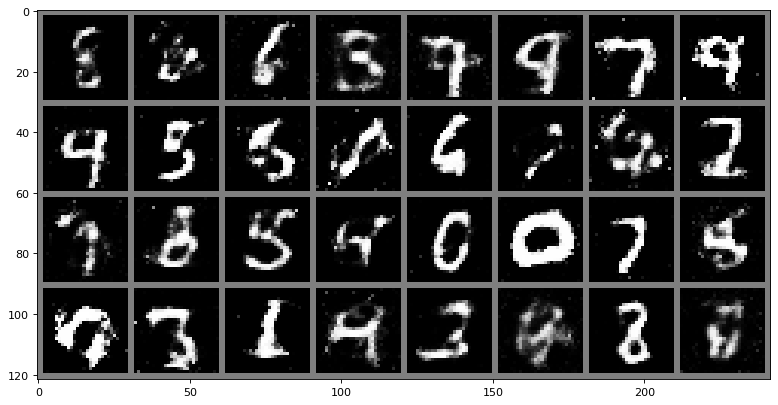

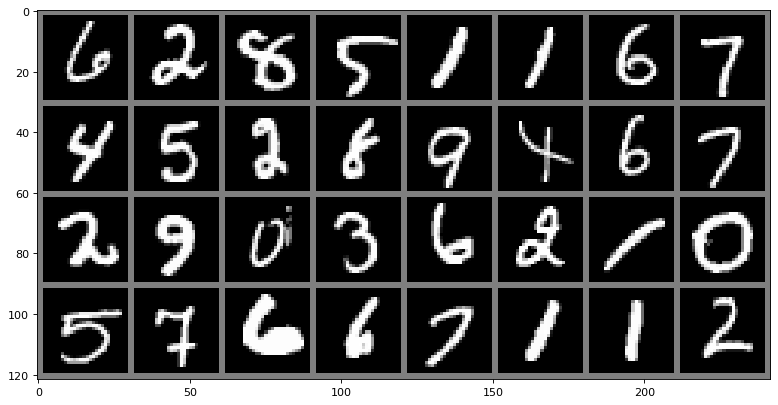

  0%|          | 5/1875 [00:00<00:38, 48.64it/s]

Epoch [44/50] Batch 0/1875                       Loss D: 0.5501, loss G: 1.0463


100%|██████████| 1875/1875 [00:22<00:00, 83.44it/s]


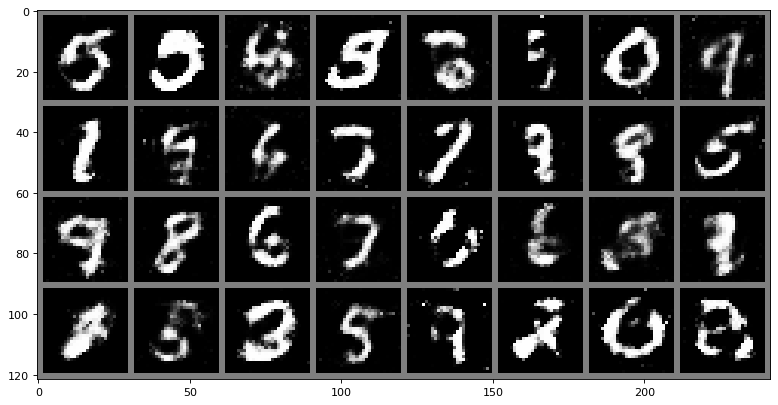

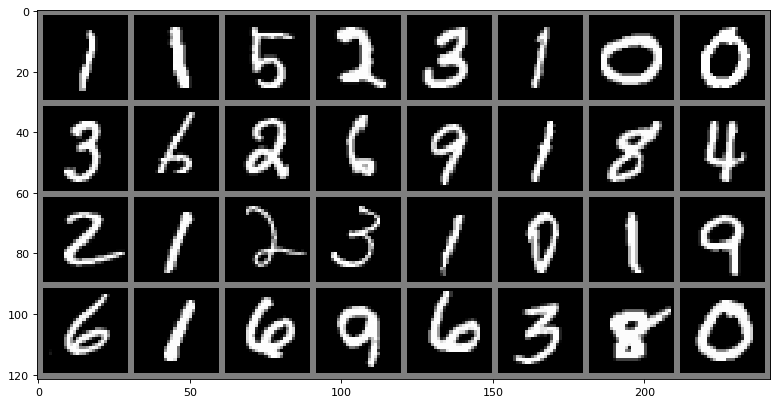

  0%|          | 6/1875 [00:00<00:34, 53.95it/s]

Epoch [45/50] Batch 0/1875                       Loss D: 0.6292, loss G: 1.0192


100%|██████████| 1875/1875 [00:22<00:00, 84.46it/s]


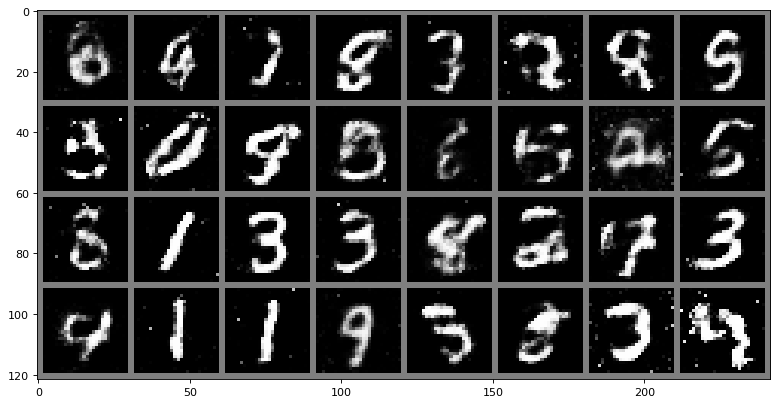

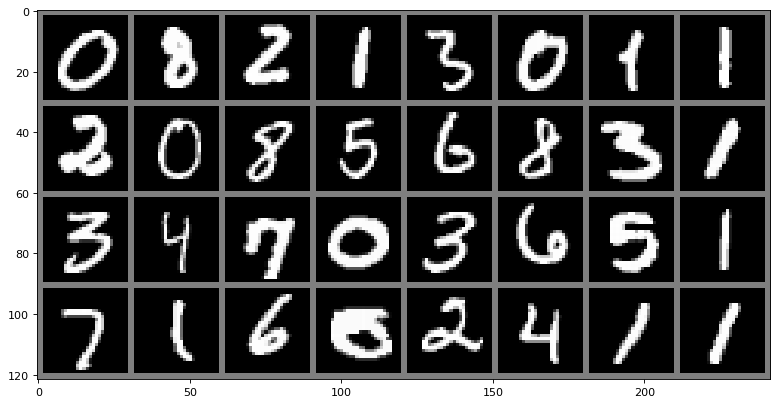

  1%|          | 16/1875 [00:00<00:24, 76.76it/s]

Epoch [46/50] Batch 0/1875                       Loss D: 0.5922, loss G: 1.1126


100%|██████████| 1875/1875 [00:22<00:00, 83.90it/s]


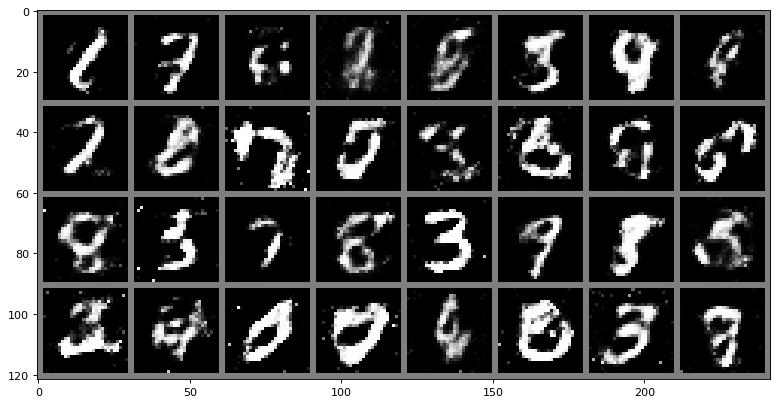

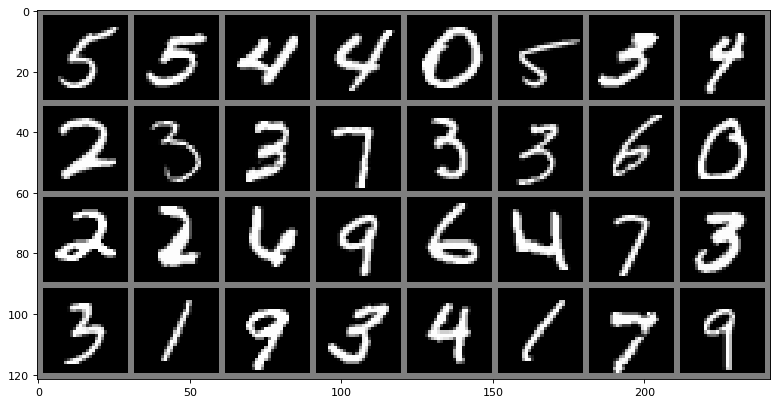

  0%|          | 7/1875 [00:00<00:28, 65.42it/s]

Epoch [47/50] Batch 0/1875                       Loss D: 0.6415, loss G: 0.9765


100%|██████████| 1875/1875 [00:22<00:00, 84.00it/s]


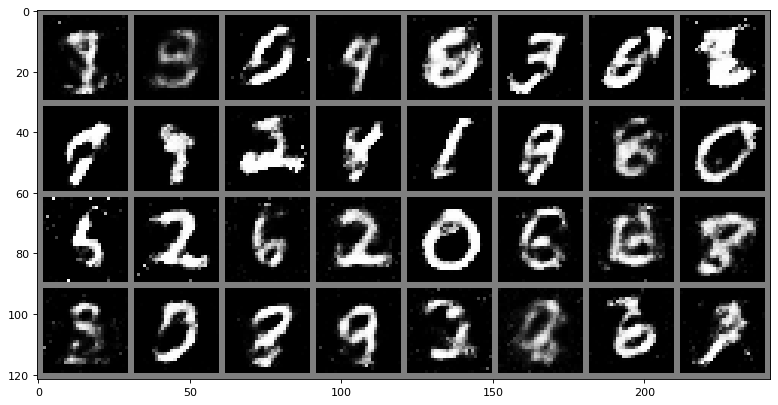

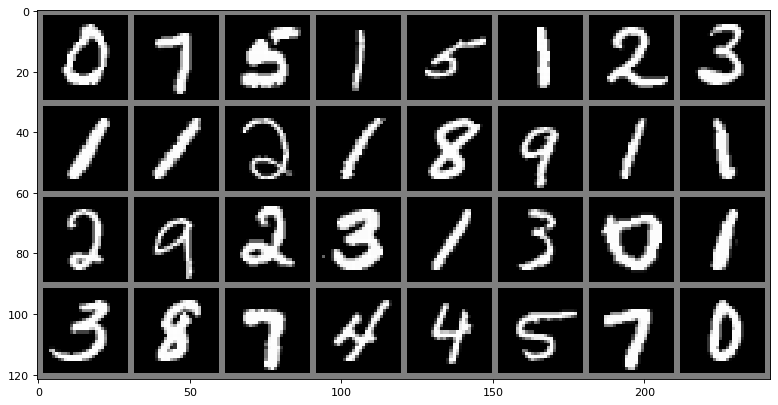

  1%|          | 15/1875 [00:00<00:25, 73.83it/s]

Epoch [48/50] Batch 0/1875                       Loss D: 0.6594, loss G: 0.8205


100%|██████████| 1875/1875 [00:22<00:00, 84.05it/s]


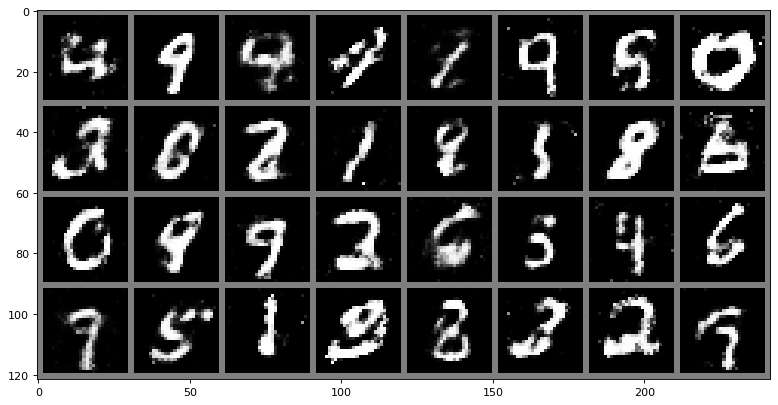

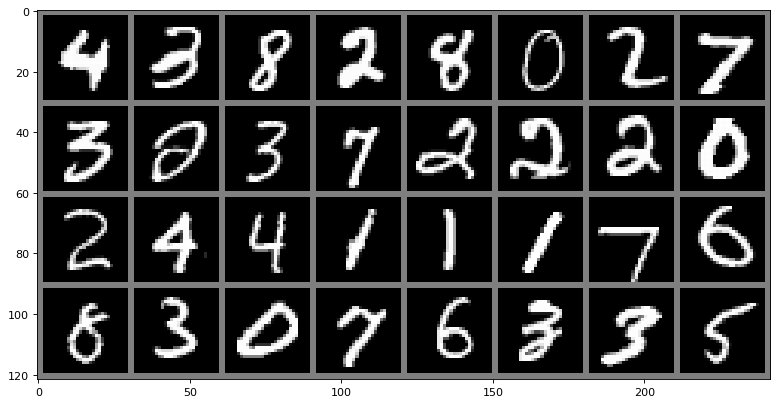

  0%|          | 7/1875 [00:00<00:27, 68.74it/s]

Epoch [49/50] Batch 0/1875                       Loss D: 0.5845, loss G: 0.8406


100%|██████████| 1875/1875 [00:22<00:00, 83.92it/s]


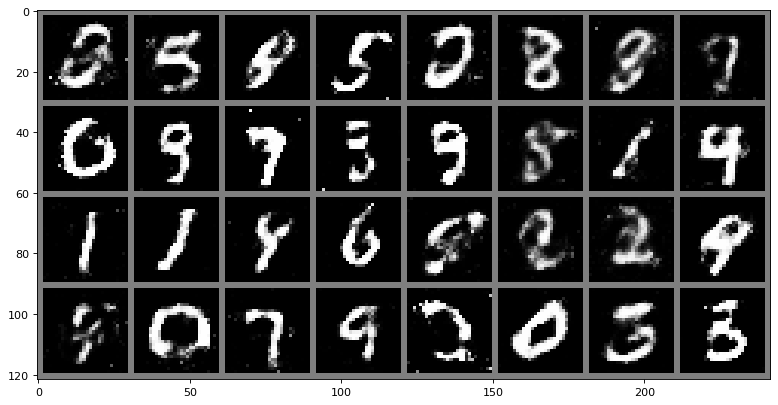

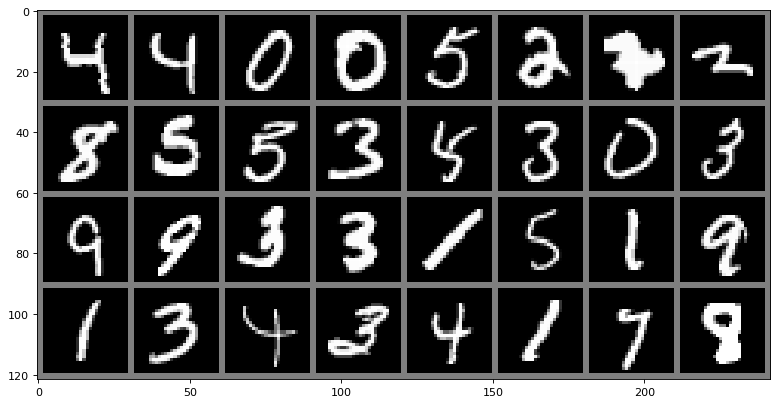

In [74]:
for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(tqdm(loader)):
        real = real.view(-1, 784).to(device)
        batch_size = real.shape[0]

        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
        noise = torch.randn(batch_size, z_dim).to(device)# mean 0, Sd 1
        fake = gen(noise)
        disc_real = disc(real).view(-1) # output of sigmoid function after feeding REAL image
        lossD_real = criterion(disc_real, torch.ones_like(disc_real)) # discrmiminater must detect this as real image so in place of actual output we put 1, ouput of dicrminater shoul also be one 
        disc_fake = disc(fake).view(-1)# output of sigmoid function after feeding FAKE image
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))# discrmiminater must detect this as Fake image so in place of actual output we put 0, ouput of dicrminater shoul also be zero
        lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()

        ### Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
        # where the second option of maximizing doesn't suffer from
        # saturating gradients
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

        if batch_idx == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \
                      Loss D: {lossD:.4f}, loss G: {lossG:.4f}"
            )
    with torch.no_grad():
        fake = fake.reshape(-1, 1, 28, 28)
        data2 = real.reshape(-1, 1, 28, 28)
        show_image(torchvision.utils.make_grid(fake.cpu()))
        show_image(torchvision.utils.make_grid(data2.cpu()))
        

            # with torch.no_grad():
            #     fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
            #     data = real.reshape(-1, 1, 28, 28)
            #     img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
            #     img_grid_real = torchvision.utils.make_grid(data, normalize=True)

            #     writer_fake.add_image(
            #         "Mnist Fake Images", img_grid_fake, global_step=step
            #     )
            #     writer_real.add_image(
            #         "Mnist Real Images", img_grid_real, global_step=step
            #     )
            #     step += 1
    
    